<center><h1><u></u>$\color{#454775}{\bf \underline {Analyzing\;Marketing\;Campaigns}}$</u></h1></center><br>


## $\color{#454775}{\bf Importing\;Liberaries}$

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

<br>

## $\color{#454775}{\bf The\;Dataset}$

In [2]:
#Loading The Marketing Dataset
marketing=pd.read_csv('marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


<br>

## $\color{#454775}{\bf Data\;Assessing}$
### $\color{#454775}{\sf 1-\;Data\;Types\;and\;Null\;Values:}$

In [3]:
# Examining data types & null values: 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


<br>

### $\color{#454775}{\sf 2-\;Dataset\;Description:}$

In [4]:
# Dataset Description:
print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')

print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')

def dates(df,cols):
    start= df[cols].astype('datetime64[ns]').min().strftime('%Y-%m-%d') 
    end= df[cols].astype('datetime64[ns]').max().strftime('%Y-%m-%d')
    return f'''
    Start: {start} 
    End  : {end}\n'''
print ('- The Data Selection:',dates(marketing,'date_served'))
print ('- The Subscription Dates:',dates(marketing,'date_subscribed'))
print ('- The Subscription Cancellation occured within:',dates(marketing,'date_canceled')) 

def col_uniques (df,cols):
    details = []
    for x, y in enumerate(df[cols].unique(),start=1): 
        details.append(f"  {x} - {y}")
    return "\n ".join(details)
print('- The Marketing Channels are as follows:\n',col_uniques(marketing,'marketing_channel'))
print('\n- The Variant categories are as follows:\n',col_uniques(marketing,'variant'))
print('\n- The Converted column is classified into:\n',col_uniques(marketing,'converted'))
print('\n- The Displayed Languages are as follows:\n',col_uniques(marketing,'language_displayed'))
print('\n- The Preferred Languages are as follows:\n',col_uniques(marketing,'language_preferred'))
print('\n- The Age Groups are classified as follows:\n',col_uniques(marketing,'age_group'))
print('\n- The Subscribing Channels are as follows:\n',col_uniques(marketing,'subscribing_channel'))
print('\n- The is_retained column is classified into:\n',col_uniques(marketing,'is_retained'))

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.

- The Data Selection: 
    Start: 2018-01-01 
    End  : 2018-01-31

- The Subscription Dates: 
    Start: 2018-01-01 
    End  : 2018-01-31

- The Subscription Cancellation occured within: 
    Start: 2018-01-05 
    End  : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55+ year

<br>

### $\color{#454775}{\sf 3-\;Summary\;Statistics:}$

In [5]:
# Summary Statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


<br>

### $\color{#454775}{\sf 4-\;Duplicated\;Values:}$

In [6]:
# Create a function to identify Duplicated Values:
def duplicates (df): 
    if df.duplicated().sum() == 0: 
        result= f'The Dataset has no Duplicated Values with {marketing.shape[0]} Row'
    else: 
        result =  f'''
- The Dataset has {df.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
"{", ".join(map(str,df[df.duplicated()].index.to_list()))}"'''
    return result

# Checking for duplicates: 
print(duplicates(marketing))


- The Dataset has 37 Duplicated rows and their indexes are as follows:
 
"470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506"


<br>

### $\color{#454775}{\sf 5-\;Missing\;Values:}$

In [7]:
# Create a function to identify the Null Values:
def missing(df):
    if df.isna().sum().sum() == 0: 
        result='The Dataset has no NULL Values'
    else: 
        result = f'''The Dataset has {df.isna().sum().sum()} NULL Values that are distributed as follows: '''
    return(result)

# Checking for Missing Values: 
print(missing(marketing))
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,15
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8181
date_canceled,9460


>$\color{#454775}{Note}:$<br>
> ***date_subscribed, date_canceled, subscribing_channel, & is_retained:***
>- _These values are naturally missing depending on whether the user subscribed or not._
>- _Some exceptions may arise that would require a precautionary measure to make sure that the data values are consistent with each other._
>- _**For Example,** A handling step to make sure that if a user converted, the subscription information must be addressed as well._

In [8]:
# Detemining the indexes of the null values for columns:
def missing_indexs (df,cols):
    result= df[cols].isna().sum()
    details= ", ".join(map(str,df[df[cols].isna()==True].index.to_list()))
    
    return f'''
- The "{cols}" Column has {result} NULL Values and their Indexes are as follows:\n 
"{details}"\n'''

# 1- date_served
print(missing_indexs(marketing,'date_served'))

# 2- marketing_channel
print(missing_indexs(marketing,'marketing_channel'))

# 3- converted
print(missing_indexs(marketing,'converted'))


- The "date_served" Column has 16 NULL Values and their Indexes are as follows:
 
"7038, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The "marketing_channel" Column has 15 NULL Values and their Indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The "converted" Column has 15 NULL Values and their Indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"



>$\color{#454775}{Note}:$<br>
> ***date_served, marketing_channel, & converted columns:*** <br>
>      _The three columns share the same missing rows (except for date_served index 7038 )_<br><br>


<br>

### $\color{#454775}{\sf 5-\;User\;Behavior:}$

In [9]:
# Counting users' frequency:
user_freq= marketing.user_id.value_counts().reset_index()
user_freq.columns=['user_id','frequency']
user_freq.sort_values('frequency',ascending=False).head()

,user_id,frequency
0,a100000882,12
10,a100000886,10
1,a100000892,10
17,a100000894,10
16,a100000893,10


In [10]:
# Calculating the number of users based on their frequency
user_freq.groupby('frequency').user_id.count().reset_index()\
        .rename(columns={'frequency':'user_engagement','user_id':'num_users'}).sort_values('user_engagement',ascending=False)

,user_engagement,num_users
7,12,1
6,10,17
5,8,2
4,5,13
3,4,62
2,3,126
1,2,2060
0,1,5028


In [11]:
# Assessing the user_id with 12 engagements:
user_freq.query('frequency==12')

,user_id,frequency
0,a100000882,12


In [12]:
# Assessing the user_id with 12 engagements (user_id: a100000882):
marketing.query('user_id=="a100000882"')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
874,a100000882,1/14/18,Instagram,personalization,True,English,English,45-55 years,1/14/18,NaN,Instagram,True
875,a100000882,1/14/18,Instagram,personalization,True,English,English,45-55 years,1/18/18,NaN,Instagram,True
876,a100000882,1/18/18,Instagram,control,True,English,English,45-55 years,1/14/18,NaN,Instagram,True
877,a100000882,1/18/18,Instagram,control,True,English,English,45-55 years,1/18/18,NaN,Instagram,True
878,a100000882,1/1/18,House Ads,control,False,English,English,45-55 years,1/14/18,NaN,Instagram,True
879,a100000882,1/1/18,House Ads,control,False,English,English,45-55 years,1/18/18,NaN,Instagram,True
880,a100000882,1/2/18,House Ads,personalization,False,English,English,45-55 years,1/14/18,NaN,Instagram,True
881,a100000882,1/2/18,House Ads,personalization,False,English,English,45-55 years,1/18/18,NaN,Instagram,True
882,a100000882,1/3/18,House Ads,personalization,False,English,English,45-55 years,1/14/18,NaN,Instagram,True
883,a100000882,1/3/18,House Ads,personalization,False,English,English,45-55 years,1/18/18,NaN,Instagram,True


In [13]:
# user_id with 10 engagements:
user_freq.query('frequency==10').head()

,user_id,frequency
1,a100000892,10
2,a100000884,10
3,a100000877,10
4,a100000878,10
5,a100000879,10


In [14]:
# Assessing the a user_id with 10 engagements (user_id: a100000878):
marketing.query('user_id=="a100000878"')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
834,a100000878,1/10/18,Email,control,True,English,English,19-24 years,1/10/18,NaN,Email,True
835,a100000878,1/10/18,Email,control,True,English,English,19-24 years,1/14/18,NaN,Email,True
836,a100000878,1/14/18,Email,control,True,English,English,19-24 years,1/10/18,NaN,Email,True
837,a100000878,1/14/18,Email,control,True,English,English,19-24 years,1/14/18,NaN,Email,True
838,a100000878,1/2/18,House Ads,control,False,English,English,19-24 years,1/10/18,NaN,Email,True
839,a100000878,1/2/18,House Ads,control,False,English,English,19-24 years,1/14/18,NaN,Email,True
840,a100000878,1/3/18,House Ads,personalization,False,English,English,19-24 years,1/10/18,NaN,Email,True
841,a100000878,1/3/18,House Ads,personalization,False,English,English,19-24 years,1/14/18,NaN,Email,True
842,a100000878,1/3/18,House Ads,control,False,English,English,19-24 years,1/10/18,NaN,Email,True
843,a100000878,1/3/18,House Ads,control,False,English,English,19-24 years,1/14/18,NaN,Email,True


In [15]:
# user_id with 8 engagements:
user_freq.query('frequency==8')

,user_id,frequency
18,a100000875,8
19,a100000876,8


In [16]:
# Assessing the a user_id with 8 engagements:
marketing.query('user_id=="a100000875"')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
808,a100000875,1/7/18,Instagram,personalization,True,English,English,19-24 years,1/7/18,3/28/18,Instagram,False
809,a100000875,1/7/18,Instagram,personalization,True,English,English,19-24 years,1/11/18,NaN,Instagram,True
810,a100000875,1/11/18,Instagram,control,True,English,English,45-55 years,1/7/18,3/28/18,Instagram,False
811,a100000875,1/11/18,Instagram,control,True,English,English,45-55 years,1/11/18,NaN,Instagram,True
812,a100000875,1/2/18,House Ads,personalization,False,English,English,19-24 years,1/7/18,3/28/18,Instagram,False
813,a100000875,1/2/18,House Ads,personalization,False,English,English,19-24 years,1/11/18,NaN,Instagram,True
814,a100000875,1/3/18,House Ads,control,False,English,English,45-55 years,1/7/18,3/28/18,Instagram,False
815,a100000875,1/3/18,House Ads,control,False,English,English,45-55 years,1/11/18,NaN,Instagram,True


In [17]:
# user_id with 5 engagements:
user_freq.query('frequency==5').head()

,user_id,frequency
20,a100002370,5
21,a100000858,5
22,a100002368,5
23,a100002369,5
24,a100000857,5


In [18]:
# Assessing the a user_id with 5 engagements:
marketing.query('user_id=="a100002369"')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
4125,a100002369,1/23/18,House Ads,control,False,English,English,36-45 years,NaN,NaN,NaN,NaN
4126,a100002369,1/25/18,Instagram,control,False,English,English,36-45 years,NaN,NaN,NaN,NaN
4127,a100002369,1/20/18,Facebook,control,False,English,English,36-45 years,NaN,NaN,NaN,NaN
4128,a100002369,1/20/18,Instagram,control,False,English,English,36-45 years,NaN,NaN,NaN,NaN
4129,a100002369,1/20/18,Facebook,control,False,English,English,36-45 years,NaN,NaN,NaN,NaN


In [19]:
# Assessing if any of users (who saw the ad 5 times) converted:
marketing[marketing['user_id'].isin(user_freq.query('frequency == 5').user_id.to_list())].query('converted==True')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
739,a100000857,1/28/18,Email,control,True,English,English,24-30 years,1/28/18,NaN,Email,True
744,a100000858,1/29/18,Push,personalization,True,English,English,0-18 years,1/29/18,NaN,Push,True
749,a100000859,1/30/18,Facebook,personalization,True,English,English,19-24 years,1/30/18,NaN,Facebook,True
754,a100000860,1/23/18,Instagram,personalization,True,English,English,24-30 years,1/23/18,NaN,Instagram,True
759,a100000861,1/24/18,Instagram,personalization,True,English,English,55+ years,1/24/18,NaN,Instagram,True
764,a100000862,1/25/18,Instagram,personalization,True,English,English,19-24 years,1/25/18,NaN,Instagram,True
769,a100000863,1/26/18,Instagram,personalization,True,English,English,24-30 years,1/26/18,NaN,Instagram,True
774,a100000864,1/27/18,Instagram,personalization,True,English,English,30-36 years,1/27/18,NaN,Instagram,True


>$\color{#454775}{Notes:}$
> - ***Users may be exposed to the same ad multiple times, with engagement frequencies ranging from 1 to 12 occurrences.*** <br><br>
> - ***After reviewing a sample of user engagements:*** <br><br>
>   - ***A near-duplicated pattern was noticed for users' multiple exposures*** <br><br>
>   - _**One user (ID: a100000882) exhibited 12 ad exposures:**_
>     - _Within these 12 records, several entries appeared repeated, with some columns identical while others showed slight variations._
>     - _*For instance,* this user converted in 4 records — two under the personalized variant (served on January 14) and two under the control variant (served on January 18). The subscription dates associated with these conversions were either January 14 or January 18, suggesting minor inconsistencies or multiple conversions logged for the same user within a short period._ <br><br>
>   - _**A similar pattern was observed for another sample user with 10 ad exposures (ID: a100000878):**_
>     - _The user interacted primarily through House Ads and Email channels._
>     - _Multiple records showed identical values across most columns, with slight variations in date_served and date_subscribed._
>     - _The user converted multiple times on the same channel (Email, control variant) — an unusual pattern since a user typically subscribes only once._
>     - _These repeated or inconsistent entries suggest potential data duplication or logging issues, where multiple impressions and conversions might have been recorded for a single actual event._ <br><br>
>   - ***For a user with 8 recorded engagements (User ID: a100000875), several inconsistencies were observed:***
>     - _Despite being recorded as the same user, their age group alternated between 19–24 years and 45–55 years, indicating a data entry or merge error._
>     - _The user converted four times. Subscription dates (1/7/18 and 1/11/18) were reused across records, often paired with inconsistent cancellation statuses._
>     - _Some records show the user as retained, while others mark them as canceled, even within the same channel and week._
>     - _This record highlights duplicated and conflicting user engagement logs, likely resulting from data integration or tracking issues._ <br><br>
>   - ***Out of the 13 users who saw the ad 5 times, only 8 converted.***

<br>

## $\color{#454775}{\bf Data\;Cleaning}$
### $\color{#454775}{\sf 1-\;Removing\;Duplicates:}$
$\color{#454775}{a)}$ Remove Exact Duplicates (37 duplicated raws)<br>
$\color{#454775}{b)}$ Remove Near-Duplicates to ensures each user’s engagement on a given day with a specific ad type is counted only once.

In [20]:
# 1- Remove exact duplicates
marketing.drop_duplicates(inplace=True)

# Checking: 
print(duplicates(marketing))

The Dataset has no Duplicated Values with 10000 Row


In [21]:
# 2- Remove near-duplicate records 
subsets= ['user_id', 'date_served',	'marketing_channel', 'variant', 'converted','age_group']
marketing.drop_duplicates(subset=subsets,inplace=True, keep='first')

In [22]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,9903,9887,9888,9903,9888,9903,9903,9903,1749,575,1749,1749
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/1/18,Instagram,True
freq,6,784,4655,5009,8853,9661,9147,1654,157,14,541,1174


<br>

### $\color{#454775}{\sf2-\;Changing\;Dates\;Data\;Types:}$
$\color{#454775}{a)}$ ***date_served:*** _str_ to _date_ <br>
$\color{#454775}{b)}$ ***date_subscribed:*** _str_ to _date_ <br>
$\color{#454775}{c)}$ ***date_canceled:*** _str_ to _date_ <br>


In [23]:
# Create a function to change the dates data types:
def date_change(df,col1,col2,col3):
    df[col1]= pd.to_datetime(df[col1]) 
    df[col2]= pd.to_datetime(df[col2]) 
    df[col3]= pd.to_datetime(df[col3]) 
    check= df.loc[:,[col1,col2,col3]].info()
    return check

date_change(marketing,'date_served','date_subscribed','date_canceled')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9903 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_served      9887 non-null   datetime64[ns]
 1   date_subscribed  1749 non-null   datetime64[ns]
 2   date_canceled    575 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 309.5 KB


<br>

### $\color{#454775}{\sf3-\;Standardize\;Subscription\;Dates:}$
To ensure logical and consistent relationships between engagement and subscription dates, the following adjustments were applied: <br>
##### $\color{#454775}{a)}$ ***For converted users:*** 
- ***Issue:*** Some records show _date_subscribed_ earlier than _date_served_. However, a user cannot subscribe before seeing the ad.
- ***Action:*** When _converted = True_ and _date_subscribed < date_served_, replace _date_subscribed_ with _date_served_.
#### $\color{#454775}{b)}$ ***For not-converted users:*** 
- ***Issue:*** Some users who were exposed to multiple ads have a _date_subscribed_ value recorded even when _converted = False_. This creates inconsistencies since non-converted records should not have a valid subscription date.
- ***Action:*** Set _date_subscribed_ to _NaN_ for all non-converted users to remove this confusion.

In [24]:
# Standardize Subscription dates (Converted Users): 
marketing['date_subscribed']=np.where(np.logical_and(marketing.converted == True,marketing.date_subscribed < marketing.date_served), 
                                      marketing['date_served'], 
                                      marketing['date_subscribed'])

# Standardize Subscription dates (Non-Converted Users): 
marketing['date_subscribed']=np.where(np.logical_and(marketing['converted'] == False, marketing.date_subscribed.isna()== False),
                                      pd.NaT,
                                      marketing['date_subscribed'])

# Changing the data type of date_subscribed
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])

#Checking: 
marketing.query("(converted == False & date_subscribed.notnull()) | (converted == True & date_subscribed < date_served)")

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained


<br> 

### $\color{#454775}{\sf 4-\;Handling\;Nulls:}$
##### ***$\color{#454775}{a)}$ Shared nulls across date_served (except for index 7038), marketing_channel, converted:*** 
Since those columns share the same missing rows, dropping them together avoids keeping incomplete entries that would otherwise distort the analysis.<br>
##### ***$\color{#454775}{b)}$ date_served (index 7038):*** 
Since this is an isolated null in the middle of the dataset, forward-filling (ffill) after sorting by date is a reasonable strategy.<br>
##### ***$\color{#454775}{c)}$ date_subscribed:***
1. ***As a Precautionary measure,*** if the user converted,the missing values (if any) would be replaced with **date_served**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>
##### ***$\color{#454775}{d)}$ date_canceled:*** 
There is no need to handle its missing values in as these values are naturally missing depending on whether the user canceled his subscription or not. Filling them would introduce bias.<br>
##### ***$\color{#454775}{e)}$ subscribing_channel*** 
1. ***As a Precautionary measure,***
   - If the user converted,the missing values (if any) would be replaced with **marketing_channel**
   - If the user didn't convert & the subscribed channel isn't empty,then these values should be replaced with **NaN**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not .<br>
##### ***$\color{#454775}{f)}$ is_retained:*** 
1. ***As a Precautionary measure,***
   - If the user converted and there is no mention for canceling the subscription ,the missing values (if any) would be replaced with **True**.
   - If the user didn't convert & the is_retained value isn't empty,then these values should be replaced with **False**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>

In [25]:
# Dropping Shared nulls across date_served (except for index 7038), marketing_channel, converted: 
marketing.dropna(subset='marketing_channel', inplace=True)

In [26]:
# Nulls at date_served column 
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null value and its index is {", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}\n''')


The date_served column has 1 null value and its index is 7038



In [27]:
# date_served (index 7038):
# Sorting the table by date served
marketing=marketing.sort_values('date_served') 

# Replacing null by forward fill method 
marketing.date_served.fillna(method='ffill', inplace=True)

# Checking:
if marketing.date_served.isna().sum() == 0: 
    print(f'\nThe Null values in date_served Column has been handeled, resulting in a {marketing.date_served.isna().sum()} Null Value for this column\n')
else: 
    print(f'''The date_served Column has {marketing.date_served.isna().sum()} NULL Values ''')


The Null values in date_served Column has been handeled, resulting in a 0 Null Value for this column



In [28]:
# date_subscribed:
marketing['date_subscribed']= np.where(np.logical_and(marketing.converted==True,marketing.date_subscribed.isna()==True),
                                       marketing.date_served,marketing.date_subscribed)

In [29]:
# subscribing_channel:
marketing['subscribing_channel']= np.where(np.logical_and(marketing.converted==True,marketing.subscribing_channel.isna()==True),
                                           marketing.marketing_channel,marketing.subscribing_channel)

marketing['subscribing_channel']= np.where(np.logical_and(marketing.converted==False,marketing.subscribing_channel.isna()==False),
                                           np.nan,marketing.subscribing_channel)

In [30]:
#is_retained:
marketing['is_retained']= np.where(np.logical_and(marketing.converted==True,marketing.is_retained.isna()==True,marketing.date_canceled.isna()==True),
                                   True,marketing.is_retained)

marketing['is_retained']= np.where(marketing.converted==False, np.nan,marketing.is_retained)

In [31]:
# Checking for Null Values:
print(missing(marketing))
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 35872 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,0
marketing_channel,0
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8853
date_canceled,9313


<br>

### $\color{#454775}{\sf 5-\;Handeling\;converted\;column:}$
 ***$\color{#454775}{-}$ Changing Data Type:***  _str_ to _boolean_

In [32]:
# Changing the data type of converted: 
marketing['converted']=marketing['converted'].astype('bool')
marketing['converted'].dtype

dtype('bool')

<br>

### $\color{#454775}{\sf 6-\;Adjusting\;user\;id\;column:}$
Due to the inconsistences in some records, where a user may have more than one age group, it would be better to adjust the user name column by adding the first 2 charcters of age group values to the user id

In [33]:
marketing['user_id']=[f'{x}-{y.split(" ")[0]}' for x,y in zip(marketing['user_id'],marketing['age_group'])]
#marketing['user_id']=[f'{x}-{y[0]}' for x,y in zip(marketing['user_id'],marketing['variant'])]
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029-0-18,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
6678,a100004324-30-36,2018-01-01,House Ads,personalization,False,English,English,30-36 years,NaT,NaT,NaN,NaN
6676,a100004323-24-30,2018-01-01,House Ads,personalization,False,English,English,24-30 years,NaT,NaT,NaN,NaN
6674,a100004322-19-24,2018-01-01,House Ads,personalization,False,English,English,19-24 years,NaT,NaT,NaN,NaN
6672,a100004321-0-18,2018-01-01,House Ads,personalization,False,German,German,0-18 years,NaT,NaT,NaN,NaN


In [34]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9888 entries, 0 to 7038
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              9888 non-null   object        
 1   date_served          9888 non-null   datetime64[ns]
 2   marketing_channel    9888 non-null   object        
 3   variant              9888 non-null   object        
 4   converted            9888 non-null   bool          
 5   language_displayed   9888 non-null   object        
 6   language_preferred   9888 non-null   object        
 7   age_group            9888 non-null   object        
 8   date_subscribed      1035 non-null   datetime64[ns]
 9   date_canceled        575 non-null    datetime64[ns]
 10  subscribing_channel  1035 non-null   object        
 11  is_retained          1035 non-null   object        
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 936.7+ KB


<br>

### $\color{#454775}{\sf 7-\;Adding\;New\;Columns:}$
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")_
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days
- ***ad_repeated:*** to check whether the user saw the ad multiple times

In [35]:
# Adding the is_house_ad Column
marketing['is_house_ad']=[
    True if x=="House Ads" 
    else False for x in marketing.marketing_channel]
marketing.loc[:,['marketing_channel','is_house_ad']].sample(5)

,marketing_channel,is_house_ad
3362,House Ads,True
6879,House Ads,True
4509,House Ads,True
5147,Push,False
2454,House Ads,True


In [36]:
# Adding matched_lang Column 
marketing['matched_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],True,False)
marketing.loc[:,['language_displayed','language_preferred','matched_lang']].sample(5)

,language_displayed,language_preferred,matched_lang
6459,English,English,True
4018,English,English,True
5299,English,English,True
6826,English,English,True
3523,English,English,True


In [37]:
# Adding dow column: 
marketing['dow']= ['Mo' if x==0
                  else 'Tu' if x== 1
                  else 'We' if x==2
                  else 'Th' if x==3
                  else 'Fr' if x==4
                  else 'Sa' if x==5
                  else 'Su'for x in marketing.date_served.dt.dayofweek]
marketing.loc[:,['date_served','dow']].sample(5)


,date_served,dow
9658,2018-01-28,Su
6650,2018-01-25,Th
6666,2018-01-01,Mo
3684,2018-01-10,We
8061,2018-01-17,We


In [38]:
# Adding ad_repeated column: 
is_repeated_user = marketing.user_id.value_counts()>1

repeated=is_repeated_user.reset_index().rename(columns={'index':'user_id','user_id':'repeated'})\
                         .query('repeated==True').user_id.to_list()


marketing['ad_repeated']=[True if x in repeated else False for x in marketing.user_id]

marketing.loc[:,['user_id','ad_repeated']].head()

,user_id,ad_repeated
0,a100000029-0-18,False
6678,a100004324-30-36,True
6676,a100004323-24-30,True
6674,a100004322-19-24,True
6672,a100004321-0-18,True


<br>

### $\color{#454775}{\sf 6-\;Mapping\;Values\;to\;Existing\;Columns:}$

> $\color{#454775}{Note}:$<br>
>_Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***marketing_channel*** will be as follows:
   - _House Ads = 1_
   - _Push = 2_
   - _Facebook = 3_
   - _Instagram = 4_
   - _Email = 5_

In [39]:
# Mapping marketing_channel column:
ch_dict={'House Ads' : 1,'Push' : 2,'Facebook' : 3,'Instagram' : 4,'Email' : 5}
marketing['ch_code']=marketing.marketing_channel.map(ch_dict).astype('Int64')
marketing.loc[:,['marketing_channel','ch_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9888 entries, 0 to 7038
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketing_channel  9888 non-null   object
 1   ch_code            9888 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 241.4+ KB


<br>

## $\color{#454775}{\bf Data\;Exploring}$
### $\color{#454775}{\sf Initial\;Investigation:}$
#### $\color{#454775}{-}$ *Building Functions to automate analysis:*
- The goal is to reduce repeated codes in order to avoid Typos & Bugs

In [40]:
# 1-Building a Function for counting users: 
def counting (df,col_name):
    nums= marketing.groupby(col_name).user_id.count().reset_index()
    nums['Percentage']=nums.user_id/nums.user_id.sum()
    return nums 

In [41]:
# 2-Building a Function for unique users: 
def uniques (df,col_name):
    distinct = marketing.groupby(col_name).user_id.nunique().reset_index()
    distinct['Percentage']=distinct.user_id/distinct.user_id.sum()
    return distinct 

In [42]:
# 3-Building a Function for Line Plots: 
def line_plot(df,col1_name,col2_name):
    # Data
    x= df[col1_name].astype('str').to_list()
    y= df[col2_name]

    # Creating the Line Chart
    plt.subplots(figsize = (8,6))
    plt.plot(x,y,color='#805D87',marker = 'H', alpha=.8)

    # Customizing Chart
    plt.title('',fontsize=14,color='#454775')

    plt.xlabel(col1_name,fontsize=12,color='#313E4C')
    plt.xticks(rotation=90,fontsize=8,color='#415366')

    plt.ylabel(col2_name,fontsize=12,color='#313E4C')
    plt.yticks(fontsize=8,color='#415366')

    # Data Annotation with values
    for i, v in enumerate(y):
      plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=7,color='#313E4C')


In [43]:
# 4-Building a Function for Bar Plots: 
def bar_plot (df,col1_name,col2_name):
    # Data
    x= df[col1_name].to_list()
    y=df[col2_name]

    # Define bar colors based on performance
    colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y]

    # Create the bar chart
    plt.bar(x,y, color=colors, alpha=.8)

    # Customizing Chart
    plt.title('',fontsize=12,color='#454775')

    plt.xlabel(col1_name,fontsize=10,color='#313E4C')
    plt.xticks(fontsize=8, color='#415366')

    plt.ylabel(col2_name,fontsize=10,color='#313E4C')
    plt.yticks(fontsize=8, color='#415366')

    # Annotate bars with their values
    for i, v in enumerate(y):
      plt.text(i,v+.003, f"{v:.0f}", ha='center', va='bottom',fontsize=8,color='#313E4C') 

In [44]:
# 5-Building a Function for Pie Plots: 
def pie_plot (df,col_name,col_label):
    # Defining colors based on performance
    colors = ['#805D87' if x == df[col_name].max() else '#94D1E7' for x in df[col_name]]
    
    #Data
    labels=df[col_label].str.capitalize().to_list()  
    size = 0.45
    
    # Creating the Chart
    plt.subplots(figsize = (3.5,3.5))
    wedges, texts, autotexts=plt.pie(df[col_name], radius=1, colors= colors,labels = labels,autopct='%1.2f%%',pctdistance=.8,
                                 textprops={'fontsize': 10,'color':'#313E4C'}, wedgeprops=dict(width=size, edgecolor='w'),startangle=100)
    
    # Customizing Chart
    for w in wedges:
        w.set_alpha(0.8)  

    plt.title('',fontsize=12,color='#454775')

In [45]:
# 6-Building a Function for Horizontal stacked Plots: 
def stackedh_plot(df,col1_name,col2_name,col3_name):
    # Data
    x=df[col1_name].to_list()
    y=df[col2_name]
    z=df[col3_name]

    # Creating the Chart
    bin_size=.5
    plt.barh(x,y, label=col2_name,color='#805D87',alpha=.8)
    plt.barh(x,z,bin_size,label=col3_name, color='#94D1E7',alpha=.8)

    # Chart Customization
    plt.title('', fontsize=12,color='#454775')

    plt.xlabel('', fontsize=10,color='#313E4C')
    plt.xticks(fontsize=8,color='#415366')

    plt.ylabel(col1_name, fontsize=10,color='#313E4C')
    plt.yticks(fontsize=8,color='#415366')

    plt.legend(fontsize=9,labelcolor='#313E4C')

In [46]:
# 7-Building a Function for Horizontal Bar Plots: 
def hbar_plot(df, col1_name,col2_name):
    # Data
    x= df[col1_name].to_list()
    y=df[col2_name]

    # Defining colors based on performance
    colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y] 

    # Creating the chart
    plt.barh(x,y,alpha=.8,color=colors)

    # Customizing the Chart
    plt.title('', fontsize=12,color='#454775')

    plt.xlabel(col2_name, fontsize=10,color='#313E4C')
    plt.xticks(fontsize=8, color='#415366')

    plt.ylabel(col1_name, fontsize=10,color='#313E4C')
    plt.yticks(fontsize=8, color='#415366')

    # Annotating bars with values
    for i,v in enumerate(y):
        plt.text(v,i,v,va='center',ha='right',fontsize=8,color='#313E4C')

<br>


#### $\color{#454775}{1-}$ *Number of Daily users:*

In [47]:
# Number of daily users :
daily_users = counting(marketing,['date_served','dow']).rename(columns={'date_served':'Date','user_id':'Daily Users'})

daily_users['Date']=daily_users.Date.dt.date 

daily_users.style.hide().format({'Percentage':'{:,.2%}'})

Date,dow,Daily Users,Percentage
2018-01-01,Mo,369,3.73%
2018-01-02,Tu,385,3.89%
2018-01-03,We,360,3.64%
2018-01-04,Th,331,3.35%
2018-01-05,Fr,326,3.30%
2018-01-06,Sa,313,3.17%
2018-01-07,Su,277,2.80%
2018-01-08,Mo,316,3.20%
2018-01-09,Tu,313,3.17%
2018-01-10,We,339,3.43%


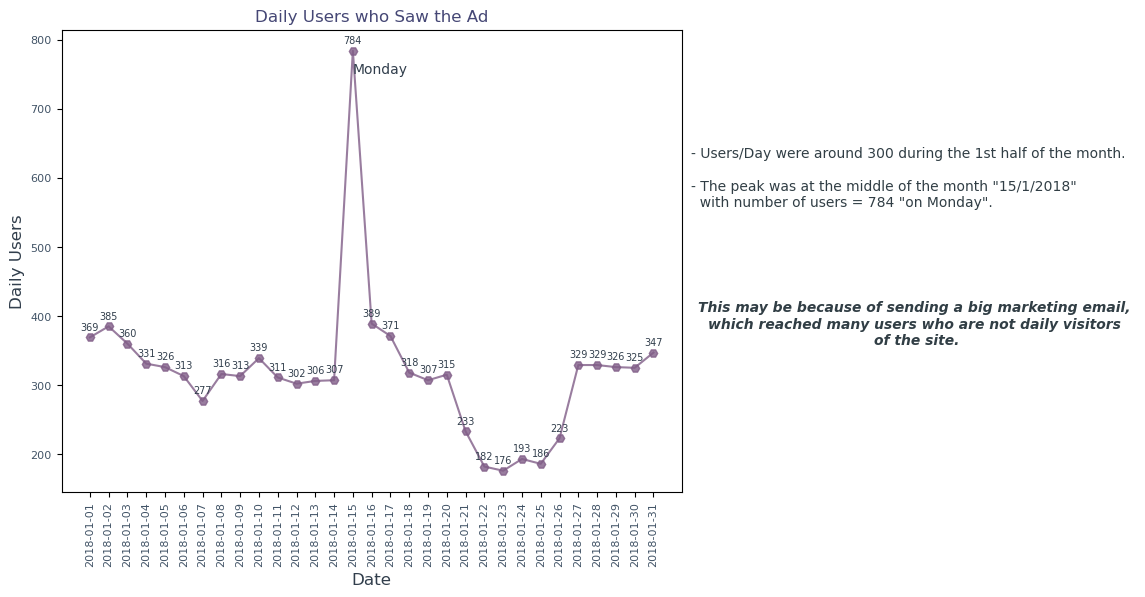

In [48]:
# Visualization - Number of daily users : 
line_plot(daily_users,'Date','Daily Users')

# Additional Customization
plt.title('Daily Users who Saw the Ad')

# Findings
text_d_u =f'''
- Users/Day were around 300 during the 1st half of the month.\n
- The peak was at the middle of the month "15/1/2018" \n  with number of users = {daily_users['Daily Users'].max()} "on Monday".\n'''

text2_d_u='''
This may be because of sending a big marketing email, \nwhich reached many users who are not daily visitors \nof the site.'''

plt.text(32,600,text_d_u,va='center',ha='left',color='#313E45')
plt.text(44,400,text2_d_u,va='center',ha='center',color='#313E45',fontstyle='italic',weight='semibold', fontsize=10)
plt.text('2018-01-15', 767, 'Monday',va='top', ha='left',color='#313E4C');

<br> 

#### $\color{#454775}{2-}$ *Number of Weekday users:*

In [49]:
# Number of weekday users :
weekday_users = counting(marketing,['dow']).rename(columns={'dow':'Day','user_id':'# Users'})\
                        .sort_values('# Users', ascending=False)

weekday_users.style.hide().format({'Percentage':'{:,.2%}'})

Day,# Users,Percentage
Mo,1977,19.99%
We,1610,16.28%
Tu,1588,16.06%
Sa,1263,12.77%
Fr,1158,11.71%
Su,1146,11.59%
Th,1146,11.59%


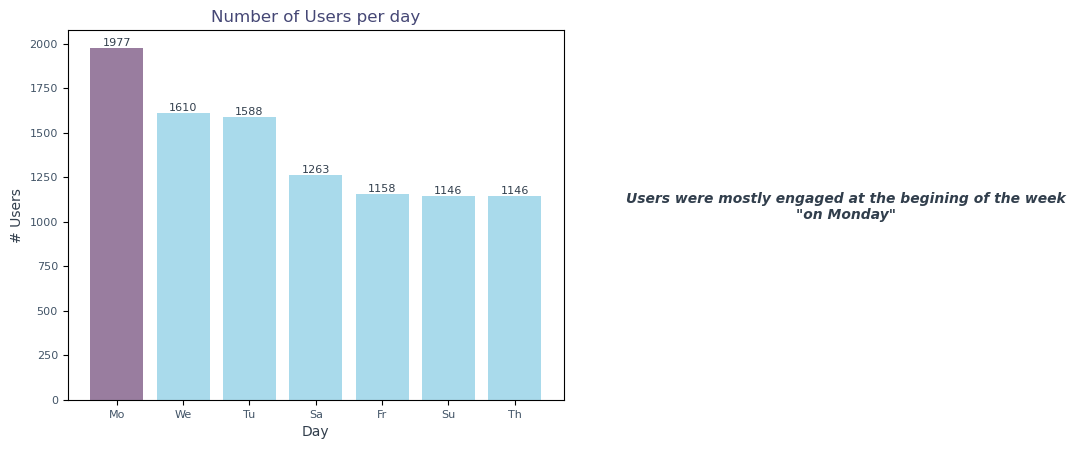

In [50]:
# Visualization - Number of weekday users:
bar_plot(weekday_users,'Day','# Users')

# Additional Customization
plt.title('Number of Users per day')

# Findings
text_w = ''' 
Users were mostly engaged at the begining of the week\n"on Monday"'''
plt.text(11,1000,text_w,va='bottom',ha='center' ,color='#313E4C',fontstyle='italic',weight='semibold',fontsize=10);

<br> 

#### $\color{#454775}{3-}$ *Number of users according to variant classification:*

In [51]:
# Number of users according to variant categories 
var_users = counting(marketing,'variant').rename(columns={'user_id':"num_users"})

var_users.style.hide().format({'Percentage':'{:,.2%}'})

variant,num_users,Percentage
control,4994,50.51%
personalization,4894,49.49%


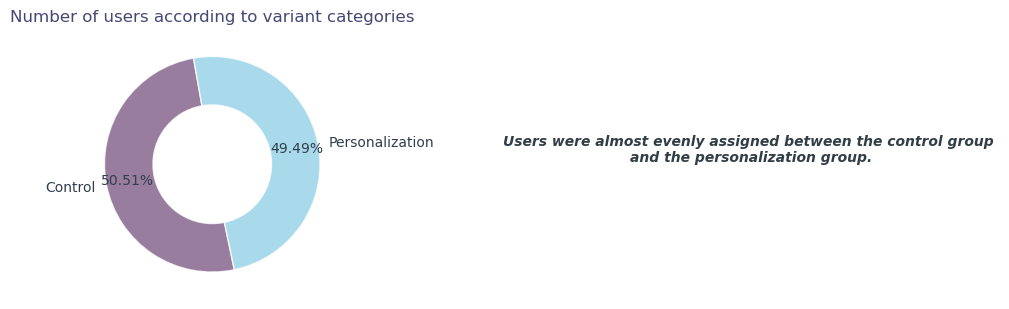

In [52]:
# Visualization - Number of users according to variant categories: 
pie_plot(var_users,'num_users','variant')

# Additional Customization
plt.title('Number of users according to variant categories')

# Findings
text_v = ''' 
Users were almost evenly assigned between the control group \nand the personalization group.'''
plt.text(5,0,text_v,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

<br> 

#### $\color{#454775}{4-}$ *Number of converted users vs. non-converted users:*

In [53]:
# Number of converted users vs. non-converted users
converted_users = counting(marketing,'converted').rename(columns={'converted':'status','user_id':"num_users",})

converted_users['status'] = np.where(converted_users['status']==True,'Converted','Not_Converted')

converted_users.style.hide().format({'Percentage':'{:,.2%}'})

status,num_users,Percentage
Not_Converted,8853,89.53%
Converted,1035,10.47%


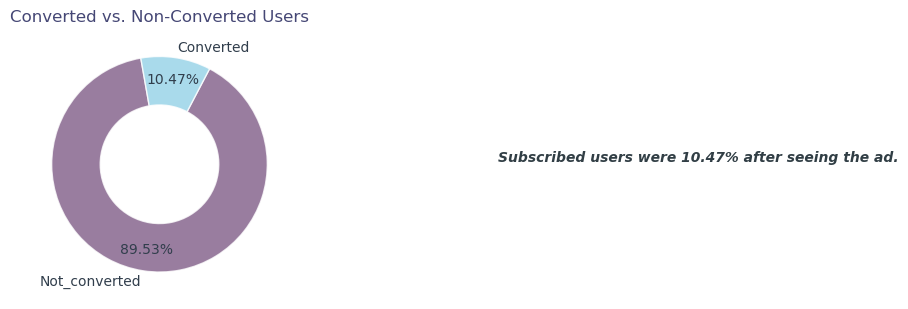

In [54]:
# Visualization - Number of converted users vs. non-converted users: 
pie_plot(converted_users,'num_users','status')

# Additional Customization
plt.title('Converted vs. Non-Converted Users')

# Findings
text_c = f''' 
Subscribed users were {converted_users.Percentage.min():.2%} after seeing the ad.'''
plt.text(5,0,text_c,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

<br> 

#### $\color{#454775}{5-}$ *Displayed Lanaguage vs. Preferred Language:*

In [55]:
# Displayed Lanaguage vs. Preferred Language
lang_displayed=counting(marketing,'language_displayed').rename(columns={'language_displayed':'Language','user_id':'Displayed'})

lang_preferred=counting(marketing,'language_preferred').rename(columns={'language_preferred':'Language','user_id':'Preferred'})

lang=lang_displayed.merge(lang_preferred,on='Language',suffixes=('_Displayed','_Preferred')).sort_values('Displayed')

lang.style.hide().format({"Percentage_Displayed":"{:,.2%}","Percentage_Preferred":"{:,.2%}"})

Language,Displayed,Percentage_Displayed,Preferred,Percentage_Preferred
Arabic,27,0.27%,145,1.47%
German,80,0.81%,165,1.67%
Spanish,135,1.37%,446,4.51%
English,9646,97.55%,9132,92.35%


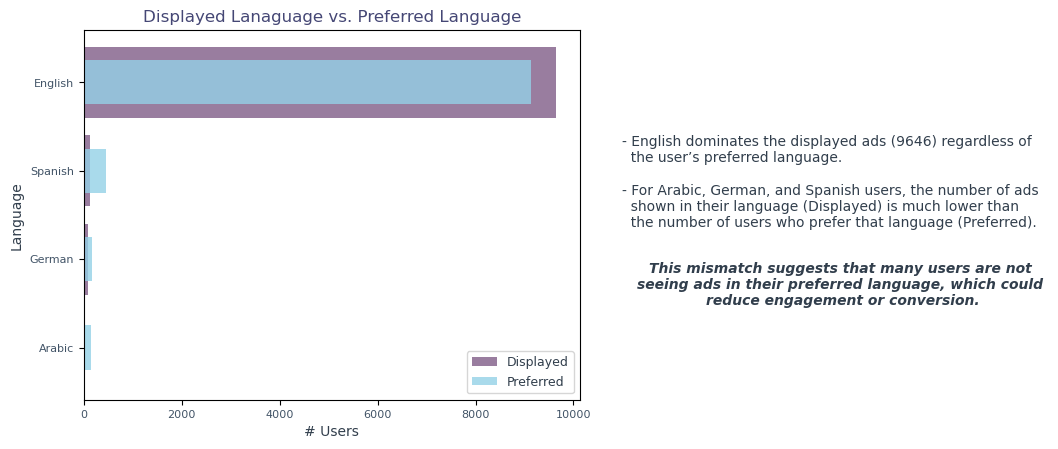

In [56]:
# Visualization - Displayed Lanaguage vs. Preferred Language:
stackedh_plot(lang,'Language','Displayed','Preferred')

# Additional Customization
plt.title('Displayed Lanaguage vs. Preferred Language')
plt.xlabel('# Users')

# Findings
text_l=f'''
- English dominates the displayed ads ({lang.Displayed.max()}) regardless of \n  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads \n  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
'''
text2_l='''
This mismatch suggests that many users are not \nseeing ads in their preferred language, which could \nreduce engagement or conversion.
'''
plt.text(11000,1,text_l,color='#313E4C'),
plt.text(15500,.3,text2_l, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C');

<br> 

#### $\color{#454775}{6-}$ *Distribution of age among users:*

In [57]:
# Distribution of age among users
age_distribution = uniques(marketing,'age_group').rename(columns={'age_group':'Age Group','user_id':'# Users'})
age_distribution['Age Group']= age_distribution['Age Group'].replace(r' years', '', regex=True)
age_distribution.style.hide().format({'Percentage':'{:,.2%}'})

Age Group,# Users,Percentage
0-18,1206,15.31%
19-24,1304,16.56%
24-30,1218,15.46%
30-36,1057,13.42%
36-45,1056,13.41%
45-55,1056,13.41%
55+,979,12.43%


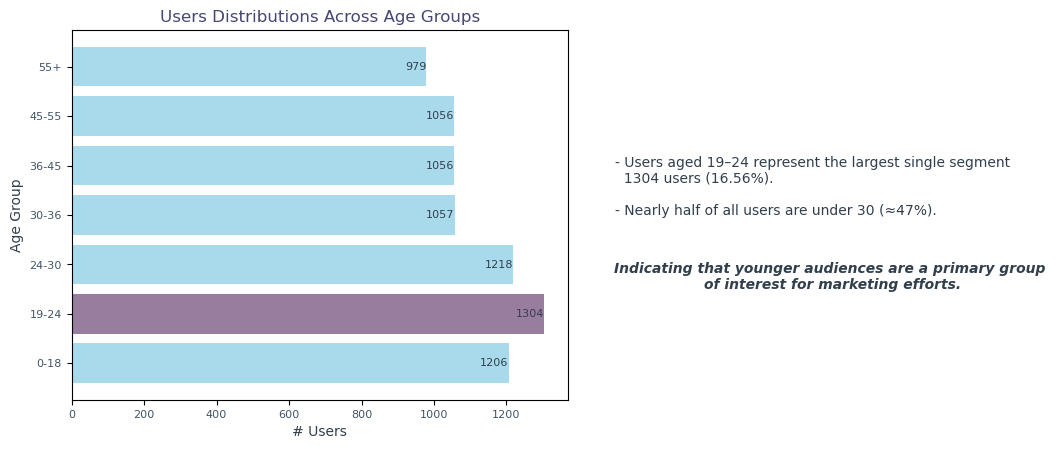

In [58]:
# Visualization - Distribution of age among users:
hbar_plot(age_distribution,'Age Group','# Users') 

# Additional Customization
plt.title('Users Distributions Across Age Groups')

# Findings
text_age_d= f'''
- Users aged 19–24 represent the largest single segment\n  {age_distribution['# Users'].max()} users ({age_distribution.Percentage.max():.2%}).\n
- Nearly half of all users are under 30 (≈47%).'''

text2_age_d=''' 
Indicating that younger audiences are a primary group \nof interest for marketing efforts.'''

plt.text(1500,3,text_age_d,color='#313E4C')
plt.text(2100,1.5,text2_age_d, ha='center',fontstyle='italic', weight='semibold', fontsize=10, color='#313E4C');

<br> 

#### $\color{#454775}{7-}$ *Marketing Channels:*

In [59]:
# Number of users for each marketing channel:
ch_users=counting(marketing,'marketing_channel')\
                   .rename(columns={'marketing_channel':'Marketing Channel','user_id':"# Users",'pct':'Percentage'})\
                   .sort_values('# Users')

ch_users.style.hide().format({'Percentage':'{:.2%}'})

Marketing Channel,# Users,Percentage
Email,559,5.65%
Push,985,9.96%
Instagram,1843,18.64%
Facebook,1846,18.67%
House Ads,4655,47.08%


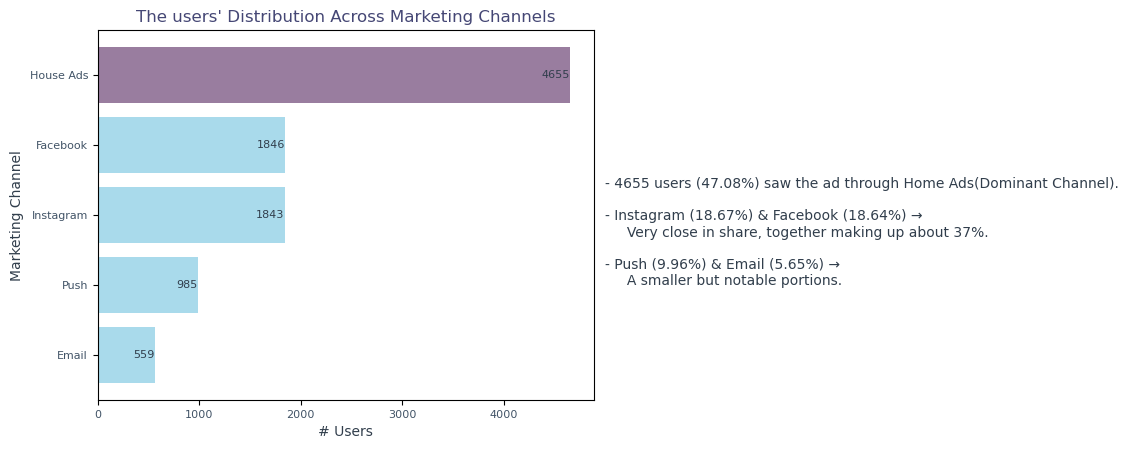

In [60]:
# Visualization - Number of users for each marketing channel:
hbar_plot(ch_users,'Marketing Channel','# Users') 

# Additional Customization
plt.title("The users' Distribution Across Marketing Channels")

# Findings
text_ch_u=f'''
- {ch_users['# Users'].max()} users ({ch_users.Percentage.max():.2%}) saw the ad through Home Ads(Dominant Channel).\n
- Instagram ({ch_users.iloc[3,2]:.2%}) & Facebook ({ch_users.iloc[2,2]:.2%}) → 
     Very close in share, together making up about 37%.\n
- Push ({ch_users.iloc[1,2]:.2%}) & Email ({ch_users.iloc[0,2]:.2%}) → 
     A smaller but notable portions.'''
plt.text(5000,1,text_ch_u,color='#313E4C');

In [61]:
# Subscribing Channels
sub_channel=uniques(marketing,'subscribing_channel').\
                  rename(columns={'subscribing_channel':'Subscribing Channel','user_id':'# Subscribers'}).\
                  sort_values('# Subscribers')

sub_channel.style.hide().format({'Percentage':'{:,.2%}'})

Subscribing Channel,# Subscribers,Percentage
Push,78,7.61%
Email,187,18.24%
Facebook,224,21.85%
Instagram,238,23.22%
House Ads,298,29.07%


In [62]:
# Retained Subscribers 
retained = marketing.query('is_retained == True').groupby('subscribing_channel').user_id.nunique().reset_index()\
                    .rename(columns={'subscribing_channel':'Subscribing Channel','user_id':'# Retained'}).\
                     sort_values('# Retained') 

retained.style.hide()

Subscribing Channel,# Retained
Push,53
Email,143
Facebook,153
Instagram,154
House Ads,173


In [63]:
# Merging subscribing channeles and retained subscribers
subscribers = sub_channel.merge(retained,on='Subscribing Channel').iloc[:,[0,1,3]]

subscribers['Retained Percentage']=subscribers['# Retained']/subscribers['# Subscribers']

subscribers['Middle Point']=(subscribers['# Subscribers']/2)

subscribers.style.hide().format({'Retained Percentage':'{:.2%}','Middle Point':'{:.0f}'})

Subscribing Channel,# Subscribers,# Retained,Retained Percentage,Middle Point
Push,78,53,67.95%,39
Email,187,143,76.47%,94
Facebook,224,153,68.30%,112
Instagram,238,154,64.71%,119
House Ads,298,173,58.05%,149


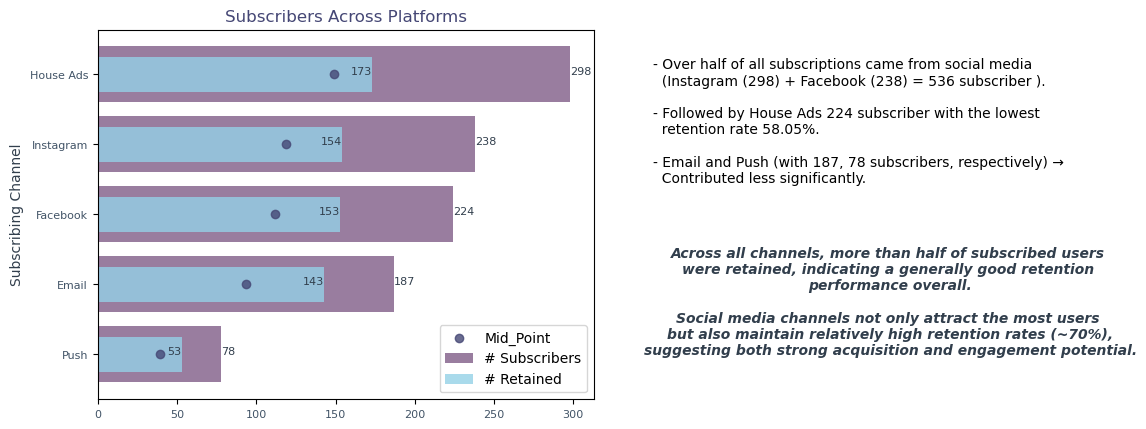

In [64]:
# Visualization - subscribing channeles and retained subscribers
stackedh_plot(subscribers,'Subscribing Channel','# Subscribers','# Retained')

mid_point=subscribers['Middle Point']
plt.scatter(mid_point,subscribers['Subscribing Channel'].to_list(), label='Mid_Point', color = '#454775', alpha=.8)

# Additional Customization
plt.title('Subscribers Across Platforms')
plt.legend()

# Annotating bars with values
for i,v in enumerate(subscribers['# Subscribers']): 
    plt.text(v,i,v,fontsize=8, color='#313E4C')

for i,v in enumerate(subscribers['# Retained']): 
    plt.text(v,i,v,ha='right',fontsize=8, color='#313E4C')

# Findings
text_sub=f''' 
- Over half of all subscriptions came from social media 
  (Instagram ({subscribers.iloc[4,1]}) + Facebook ({subscribers.iloc[3,1]}) = {subscribers.iloc[4,1]+subscribers.iloc[3,1]} subscriber ).\n
- Followed by House Ads {subscribers.iloc[2,1]} subscriber with the lowest \n  retention rate {subscribers['Retained Percentage'].min():.2%}.\n 
- Email and Push (with {subscribers.iloc[1,1]}, {subscribers.iloc[0,1]} subscribers, respectively) →\n  Contributed less significantly.\n
'''

text2_sub='''
Across all channels, more than half of subscribed users \nwere retained, indicating a generally good retention \nperformance overall.\n
Social media channels not only attract the most users \nbut also maintain relatively high retention rates (~70%),\nsuggesting both strong acquisition and engagement potential.'''

plt.text(350,2,text_sub)
plt.text(500,0,text2_sub, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

<br>

### $\color{#454775}{\sf Influence\;Factors:}$
### $\color{#454775}{Q1:}$ ***What factors most stringly influence user Conversion and Retention Rates?***
#### $\color{#454775}{-}$ *Building Functions to automate analysis:*

In [91]:
# 1- Conversion & Retention Rates function:
def con_ret (df,df2,cols,target): 
    first= df.groupby(cols)[target].nunique().reset_index()
    second=df2.groupby(cols)[target].nunique().reset_index()
    result=first.merge(second,on= cols, suffixes=('_total','_part'))
    result['Rate']= round(result.iloc[:,-1]/result.iloc[:,-2],4)
    result=result.sort_values('Rate', ascending = False)
    result.columns = [x.replace('_', ' ').title() if x in cols else x for x in result.columns]
    return result


In [116]:
# 2- Comparison between Conversion & Retention Rates function:
def comparison (df,df2,df3,cols,target): 
    first= df.groupby(cols)[target].nunique().reset_index()
    second=df2.groupby(cols)[target].nunique().reset_index()
    result1=first.merge(second,on= cols)
    result1['Conversion Rate']= round(result1.iloc[:,-1]/result1.iloc[:,-2],4)
    
    third = df3.groupby(cols)[target].nunique().reset_index()
    result2= second.merge(third,on= cols)
    result2['Retention Rate']= round(result2.iloc[:,-1]/result2.iloc[:,-2],4)
    
    required_cols=list(cols)+ ['Conversion Rate','Retention Rate']
    
    final_result= result1.merge(result2, on=cols).loc[:,required_cols]
    final_result.columns = [x.replace('_', ' ').title() if x in cols else x for x in final_result.columns]
    final_result= final_result.sort_values('Conversion Rate', ascending = False)
    
    return final_result

In [109]:
# 3- Bar Plot function:
def bars (df,col1,col2,rate):
    # Data
    x= df[col1].astype('str').to_list()
    y= df[col2]

    # Defining colors based on performance
    colors = ['#805D87' if n > rate else '#94D1E7' for n in y] 

    # Creating the chart
    plt.bar(x,y,.6, color=colors, alpha=.8)
    plt.axhline(y=rate, color='#454775', linestyle='--', linewidth=1, label='Overall '+col2, alpha=.5)

    # Customizing the chart
    plt.title('', fontsize=12,color='#454775')

    plt.xlabel(col1, fontsize=10, color='#313E4C')
    plt.xticks(fontsize=8,color='#415366')

    plt.ylabel(col2, fontsize=10, color='#313E4C')
    plt.yticks(fontsize=8,color='#415366')

    plt.legend(fontsize=9,labelcolor='#313E4C')

    # Annotating chart with values
    plt.text(3.5,rate, f'{rate:.2%}', ha= 'left', va ='bottom',color='#313E4C', fontsize=9,fontstyle='italic',weight='semibold')

    for i,v in enumerate(y):
        plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')


In [126]:
# 4- Combo Chart function:
def combo (df,col1,col2,col3,rate1,rate2): 
    # Data
    x = df[col1].to_list()
    y = df[col2]
    z = df[col3]

    # Defining colors based on performance
    colors1 = ['#805D87' if n > rate1 else '#94D1E7' for n in y]
    colors2 = ['#454775' if m > rate2 else '#EA9FBB' for m in z]

    # Creating the chart 
    fig,ax1=plt.subplots(figsize=(6, 6))

    # 1- Bar Plot 
    ax1.bar(x,y, alpha=.8, color=colors1)

    # 2- Line & Scatter Plots
    ax2 = ax1.twinx()
    ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
    ax2.scatter(x,z,color=colors2)

    # Customizing the chart
    plt.title('', fontsize=12, color='#454775')

    ax1.set_xlabel(col1, fontsize=10,color='#313E4C')
    ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

    ax1.set_ylabel(col2, fontsize=10,color='#313E4C')
    ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
    ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

    ax2.set_ylabel(col3, fontsize=10, color='#313E4C')
    ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
    ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

    # Legend
    above_cr = mpatches.Patch(color='#805D87', label=f'CR > {rate1:.2%}')
    below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {rate1:.2%}')
    above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {rate2:.2%}')
    below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {rate2:.2%}')
    plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

<br>

#### *Conversion & Retention Rates*

In [102]:
# 1- Overall Conversion Rate
# Creating converted_users table:
converted_users = marketing.query('converted == True')

# Calculating The Overall Conversion Rate
converted=converted_users.user_id.nunique()
total_users = marketing.user_id.nunique()

conversion_rate = converted/total_users

print(f'\nThe Overall Conversion Rate = {round(conversion_rate*100,2)}%\n')


The Overall Conversion Rate = 13.01%



In [103]:
# 2- Overall Retention Rate (spaning 1 month)
# Creating retained_users table:
retained_users = converted_users.query('is_retained == True') 

# Calculating The Overall Retention Rate
retained=retained_users.user_id.nunique()

retention_rate = retained/converted

print(f'\nThe Overall Retention Rate  = {round(retention_rate*100,2)}%\n')


The Overall Retention Rate  = 65.95%



<br> 

#### $\color{#454775}{1-}$ *Marketing Channels:*

In [104]:
# Calculating Conversion Rate across marketing channels
conversion_ch =con_ret(marketing,converted_users,'marketing_channel','user_id')
conversion_ch.columns=['Marketing Channel','Total Users','Converted','Conversion Rate']
conversion_ch.style.hide().format({'Conversion Rate':'{:,.2%}'})

Marketing Channel,Total Users,Converted,Conversion Rate
Email,554,187,33.75%
Instagram,1798,238,13.24%
Facebook,1795,224,12.48%
Push,982,78,7.94%
House Ads,4025,298,7.40%


In [105]:
# Calculating Retention Rate across marketing channels
retention_ch=con_ret(converted_users,retained_users,'marketing_channel','user_id')
retention_ch.columns=['Marketing Channel','Converted','Retained','Retention Rate']
retention_ch.style.hide().format({'Retention Rate':'{:,.2%}'})

Marketing Channel,Converted,Retained,Retention Rate
Email,187,143,76.47%
Facebook,224,153,68.30%
Push,78,53,67.95%
Instagram,238,154,64.71%
House Ads,298,173,58.05%


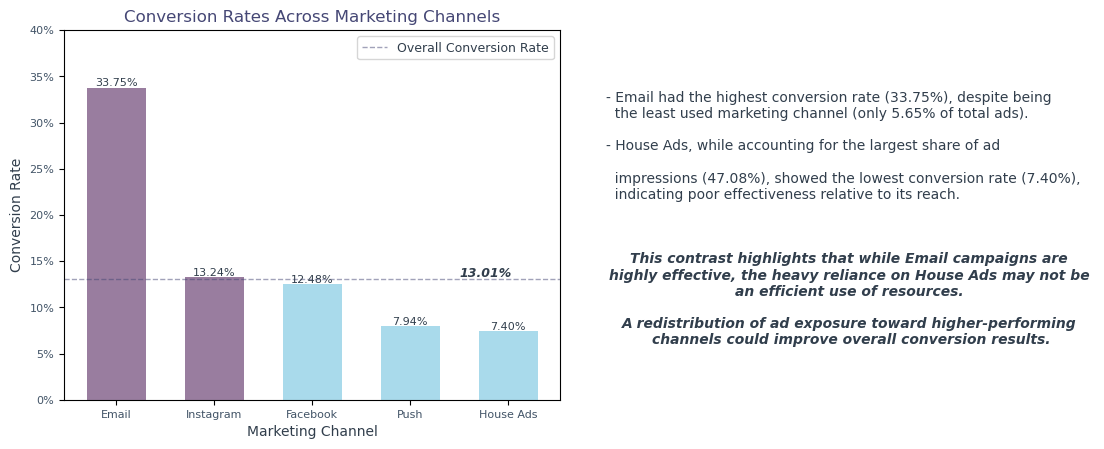

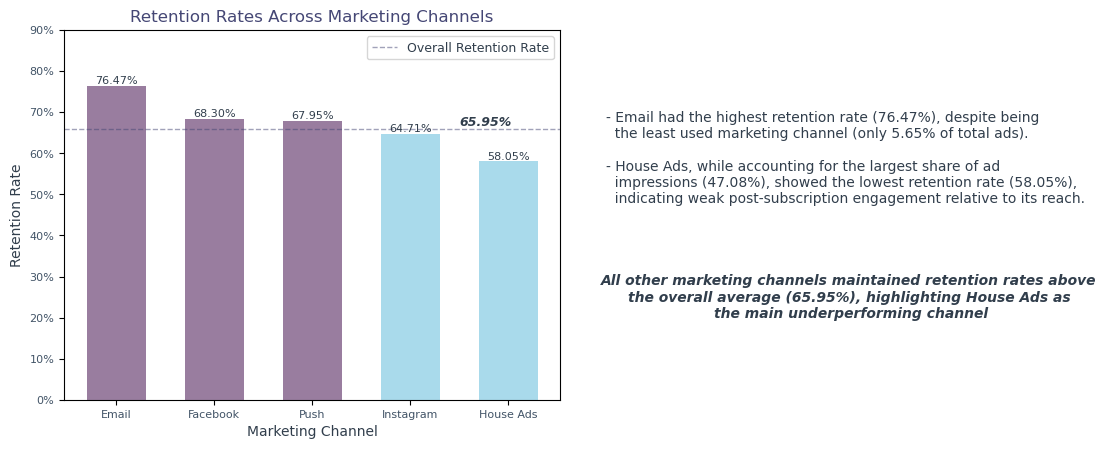

In [106]:
# 1- Visualization - Conversion Rates Across Marketing Channels: 
bars(conversion_ch,'Marketing Channel','Conversion Rate',conversion_rate)

# Additional Customization
plt.title('Conversion Rates Across Marketing Channels')
plt.yticks(np.arange(0,.45,.05),[f'{y:.0%}' for y in np.arange(0,.45,.05)])

# Findings 
text_conv_ch=f'''
- Email had the highest conversion rate ({conversion_ch['Conversion Rate'].max():.2%}), despite being 
  the least used marketing channel (only {ch_users.Percentage.min():.2%} of total ads).\n
- House Ads, while accounting for the largest share of ad \n  
  impressions ({ch_users.Percentage.max():.2%}), showed the lowest conversion rate ({conversion_ch['Conversion Rate'].min():.2%}), 
  indicating poor effectiveness relative to its reach.\n'''

text2_conv_ch='''
This contrast highlights that while Email campaigns are \nhighly effective, the heavy reliance on House Ads may not be \nan efficient use of resources. \n
A redistribution of ad exposure toward higher-performing \nchannels could improve overall conversion results.'''

plt.text(5,.2,text_conv_ch, color='#313E4C')
plt.text(7.5,.06,text2_conv_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();


# 2- Visualization - Retention Rates Across Marketing Channels: 
bars(retention_ch,'Marketing Channel','Retention Rate',retention_rate)

# Additional Customization
plt.title('Retention Rates Across Marketing Channels')
plt.yticks(np.arange(0,1,.1),[f'{y:.0%}' for y in np.arange(0,1,.1)])

# Findings 
text_ret_ch=f'''
- Email had the highest retention rate ({retention_ch['Retention Rate'].max():.2%}), despite being \n  the least used marketing channel (only {ch_users.Percentage.min():.2%} of total ads).\n
- House Ads, while accounting for the largest share of ad \n  impressions ({ch_users.Percentage.max():.2%}), showed the lowest retention rate ({retention_ch['Retention Rate'].min():.2%}), 
  indicating weak post-subscription engagement relative to its reach.\n
'''

text2_ret_ch=f'''
All other marketing channels maintained retention rates above \nthe overall average ({retention_rate:.2%}), highlighting House Ads as 
the main underperforming channel'''

plt.text(5,.4,text_ret_ch, color='#313E4C')
plt.text(7.5,.2,text2_ret_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

In [119]:
# Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
performance_ch= comparison(marketing,converted_users,retained_users,['marketing_channel'],'user_id')

performance_ch.style.hide().format({'Conversion Rate':'{:,.2%}','Retention Rate':'{:,.2%}'})

Marketing Channel,Conversion Rate,Retention Rate
Email,33.75%,76.47%
Instagram,13.24%,64.71%
Facebook,12.48%,68.30%
Push,7.94%,67.95%
House Ads,7.40%,58.05%


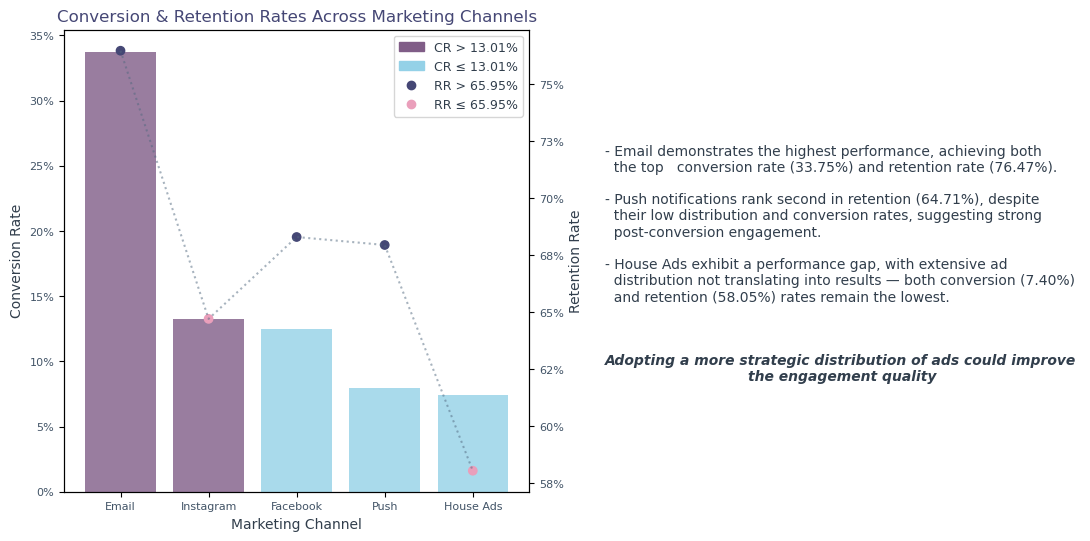

In [128]:
combo(performance_ch,'Marketing Channel','Conversion Rate','Retention Rate', conversion_rate, retention_rate)
# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels')
# Findings
text_perform_ch=f'''
- Email demonstrates the highest performance, achieving both \n  the top   conversion rate ({perform_ch_con.max():.2%}) and retention rate ({perform_ch_ret.max():.2%}).\n
- Push notifications rank second in retention ({perform_ch_ret[3]:.2%}), despite \n  their low distribution and conversion rates, suggesting strong 
  post-conversion engagement.\n
- House Ads exhibit a performance gap, with extensive ad \n  distribution not translating into results — both conversion ({perform_ch_con.min():.2%})
  and retention ({perform_ch_ret.min():.2%}) rates remain the lowest.'''
text2_perform_ch='''
Adopting a more strategic distribution of ads could improve \nthe engagement quality'''
plt.text(5.5,.655,text_perform_ch, color='#313E4C')
plt.text(8.2,.62,text2_perform_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

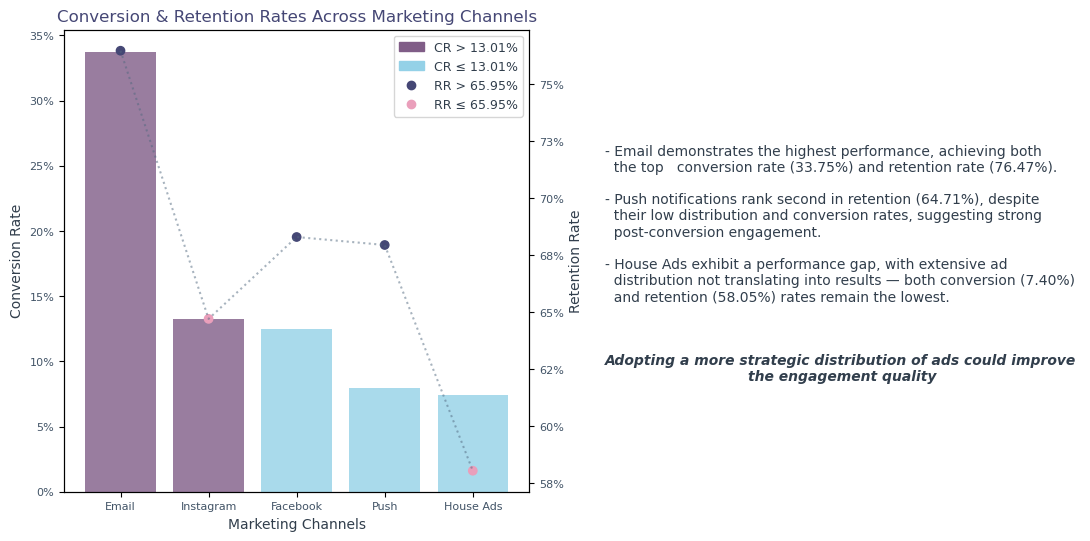

In [125]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
# Data
perform_ch=performance_ch['Marketing Channel'].to_list()
perform_ch_con=performance_ch['Conversion Rate']
perform_ch_ret=performance_ch['Retention Rate']

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_ch_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_ch_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6, 6))

# 1- Conversion Rate (Bar)
ax1.bar(perform_ch,perform_ch_con, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_ch,perform_ch_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_ch,perform_ch_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')

ax1.set_xlabel('Marketing Channels', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

# Findings
text_perform_ch=f'''
- Email demonstrates the highest performance, achieving both \n  the top   conversion rate ({perform_ch_con.max():.2%}) and retention rate ({perform_ch_ret.max():.2%}).\n
- Push notifications rank second in retention ({perform_ch_ret[3]:.2%}), despite \n  their low distribution and conversion rates, suggesting strong 
  post-conversion engagement.\n
- House Ads exhibit a performance gap, with extensive ad \n  distribution not translating into results — both conversion ({perform_ch_con.min():.2%})
  and retention ({perform_ch_ret.min():.2%}) rates remain the lowest.'''
text2_perform_ch='''
Adopting a more strategic distribution of ads could improve \nthe engagement quality'''
plt.text(5.5,.655,text_perform_ch, color='#313E4C')
plt.text(8.2,.62,text2_perform_ch, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{2-}$ *Variant Classification:*

In [ ]:
# Calculating Conversion Rate across variant classifications
converted_var=converted_users.groupby('variant').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_var = marketing.groupby('variant').user_id.nunique().reset_index()\
                     .rename(columns={'user_id':'total_users'})

conversion_var =users_var.merge(converted_var, on ='variant')

conversion_var['conversion_rate']=conversion_var['converted']/conversion_var['total_users']

conversion_var = conversion_var.sort_values('conversion_rate', ascending= False)

conversion_var.style.hide().format({'conversion_rate':'{:,.2%}'})

In [ ]:
# Calculating Retention Rate witnin Variant Classifications
retained_var=retained_users.groupby('variant').user_id.nunique().reset_index()\
                           .rename(columns={'user_id':'retained'})

retention_var = converted_var.merge(retained_var, on='variant')

retention_var['retention_rate']=retention_var['retained']/retention_var['converted']

retention_var=retention_var.sort_values('retention_rate', ascending=False)

retention_var.style.hide().format({'retention_rate':'{:,.2%}'})

In [ ]:
# 1- Visualization - Conversion Rates Within Variant Classifications: 
# Data
con_var= conversion_var.variant.to_list()
con_var_rate= conversion_var.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_var_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(con_var,con_var_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Within Ad Classifications', fontsize=12,color='#454775')

plt.xlabel('Classification', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.2,.02),[f'{y:.0%}' for y in np.arange(0,.2,.02)], fontsize=8,color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(con_var_rate):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_con_var=f'''
- Personalized ads achieved a higher conversion rate ({con_var_rate.max():.2%}) than 
  both the control group ({con_var_rate.min():.2%}) and the overall conversion rate ({conversion_rate:.2%}).\n'''

text2_con_var='''
Despite being almost evenly distributed across marketing channels, \npersonalized ads successfully encouraged more users to subscribe 
compared to standard (control) ads.'''

plt.text(1.4,.1,text_con_var,color='#313E4C')
plt.text(2.4,.06,text2_con_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()

# 2-Visualization - Retention Rates Across Variant Classifications: 
# Data
ret_var= retention_var.variant.to_list()
ret_var_rate= retention_var.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_var_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(ret_var,ret_var_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Ad Classifications', fontsize=12,color='#454775')

plt.xlabel('Classification', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),[f'{y:.0%}' for y in np.arange(0,.9,.1)], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_var_rate):
    plt.text(i,v-.1,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_ret_var=f'''
- Control ads achieved a higher retention rate ({ret_var_rate.max():.2%})\n  compared to the Pesonalized group ({ret_var_rate.min():.2%}).\n
- Retention Rate of the Controlled Ads is more than the Overall \n  Retention Rate of {retention_rate:.2%}'''

text2_ret_var='''
Users acquired through Controlled ads are more likely to stay \nsubscribed'''

plt.text(1.4,.4,text_ret_var,color='#313E4C')
plt.text(2.3,.2,text2_ret_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show();

In [ ]:
# Comparing Conversion Rates with Retention Rates Within Variant Classification: 
performance_var=conversion_var.merge(retention_var,on='variant')\
                            .loc[:,['variant','conversion_rate','retention_rate']]

performance_var.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

In [ ]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Variant Classification: 
# Data
perform_var=performance_var.variant.to_list()
perform_var_con=performance_var.conversion_rate
perform_var_ret=performance_var.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_var_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_var_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_var,perform_var_con,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_var,perform_var_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_var,perform_var_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Within Ad Classification', fontsize=12, color='#454775')

ax1.set_xlabel('Ad Classification', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper center')

# Findings
text_perform_var=f'''
- Personalized ads show significantly higher conversion rate of {perform_var_con.max():.2%}.\n 
- A Higher retention rate of was achieved by Controlled Ads {perform_var_ret.max():.2%}, \n  exceeding the Personalized group ({perform_var_ret.min():.2%}).'''

text2_perform_var='''
This indicates that tailored advertising attracts more users \nto subscribe but doesn't guarantee maintaining them.'''

plt.text(1.58,.68,text_perform_var, color='#313E4C')
plt.text(2.5,.665,text2_perform_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{3-}$ *Displayed Language:*

In [ ]:
# Calculating Conversion Rate across Displayed Languages
converted_displayed_lang=converted_users.groupby('language_displayed').user_id.nunique().reset_index()\
                                        .rename(columns={'language_displayed':'language','user_id':'converted'})

users_displayed_lang = marketing.groupby('language_displayed').user_id.nunique().reset_index()\
                                .rename(columns={'language_displayed':'language','user_id':'total_users'})

conversion_displayed_lang =users_displayed_lang.merge(converted_displayed_lang, on ='language')

conversion_displayed_lang['conversion_rate']=conversion_displayed_lang['converted']/conversion_displayed_lang['total_users']

conversion_displayed_lang=conversion_displayed_lang.sort_values('conversion_rate',ascending=False)

conversion_displayed_lang.style.hide().format({'conversion_rate':'{:,.2%}'})

In [ ]:
# Calculating Retention Rate across Displayed Languages
retained_displayed_lang=retained_users.groupby('language_displayed').user_id.nunique().reset_index()\
                                      .rename(columns={'language_displayed':'language','user_id':'retained'})

retention_displayed_lang = converted_displayed_lang.merge(retained_displayed_lang, on='language')

retention_displayed_lang['retention_rate']=retention_displayed_lang['retained']/retention_displayed_lang['converted']

retention_displayed_lang=retention_displayed_lang.sort_values('retention_rate', ascending=False)

retention_displayed_lang.style.hide().format({'retention_rate':'{:,.2%}'})

In [ ]:
# 1- Visualization - Conversion Rates Across Displayed Languages: 
# Data
con_dlang= conversion_displayed_lang.language.to_list()
con_dlang_rate= conversion_displayed_lang.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_dlang_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(con_dlang,con_dlang_rate,.5, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Displayed Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10,color='#313E4C')
plt.yticks(np.arange(0,1,.1),[f'{y:.0%}' for y in np.arange(0,1,.1)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(2.9,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(sorted(con_dlang_rate,reverse=True)):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text_con_dlang=f'''
- Non-English languages show notably higher conversion rates compared to \n  English.\n
- German ({conversion_displayed_lang.iloc[0,3]:.2%}) & Arabic ({conversion_displayed_lang.iloc[1,3]:.2%}) conversion rates  are significantly 
  higher than the overall conversion rate ({conversion_rate:.2%})
'''
text2_con_dlang='''
Localized ads in these languages are significantly more effective.'''

plt.text(3.8,.5,text_con_dlang,color='#313E4C')
plt.text(6.5,.3,text2_con_dlang, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()


# 2- Visualization - Retention Rates Across Displayed Languages: 
# Data
ret_dlang= retention_displayed_lang.language.to_list()
ret_dlang_rate= retention_displayed_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_dlang_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))

plt.bar(ret_dlang,ret_dlang_rate,.5, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates Across Displayed Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),[f'{y:.0%}' for y in np.arange(0,.9,.1)],fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(2.9,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_dlang_rate):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_ret_dlang=f'''
- English show the highest retention rate  {ret_dlang_rate.max():.2%} (nearly equals Overall Retention \n  Rate {retention_rate:.2%}).\n
- Spanish ({retention_displayed_lang.iloc[1,3]:.2%}) & German ({retention_displayed_lang.iloc[2,3]:.2%}) alighned closely to the Overall \n  Retention Rate ({retention_rate:.2%}).\n 
- Arabic users had moderate retention rate {retention_displayed_lang.iloc[3,3]:.2%}(below the Overall Retention \n  Rate ({retention_rate:.2%}) 
 '''
text2_ret_dlang='''
Maintaining engagement after conversion may require additional \nattention for these audiences.'''

plt.text(3.8,.4,text_ret_dlang,color='#313E4C')
plt.text(6.7,.2,text2_ret_dlang, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()

In [ ]:
# Comparing Conversion Rates with Retention Rates Across Displayed Languages: 
performance_displayed_lang=conversion_displayed_lang.merge(retention_displayed_lang,on='language')\
                                                    .loc[:,['language','conversion_rate','retention_rate']]

performance_displayed_lang.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

In [ ]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Displayed Languages:
# Data
perform_dlang=performance_displayed_lang.language.to_list()
perform_dlang_con=performance_displayed_lang.conversion_rate
perform_dlang_ret=performance_displayed_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_dlang_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_dlang_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_dlang,perform_dlang_con,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_dlang,perform_dlang_ret, ls='dotted', color='#51687F', alpha=.5)
ax2.scatter(perform_dlang,perform_dlang_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Displayed Languages', fontsize=12, color='#454775')

ax1.set_xlabel('Language', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='center right')

# Findings
text_perform_dlang='''
Languages other than English showed a higher conversion rates, \nbut English successfuly managed to maintain subscribers'''
plt.text(6.5,.64,text_perform_dlang, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{4-}$ *Matched Language:*

In [ ]:
# Calculating Conversion Rate across Matched Languages
converted_lang=converted_users.groupby('matched_lang').user_id.nunique().reset_index()\
                              .rename(columns={'matched_lang':'language_status','user_id':'converted'})

users_lang = marketing.groupby('matched_lang').user_id.nunique().reset_index()\
                      .rename(columns={'matched_lang':'language_status','user_id':'total_users'})

conversion_lang =users_lang.merge(converted_lang, on ='language_status')

conversion_lang['conversion_rate']=conversion_lang['converted']/conversion_lang['total_users']

conversion_lang['language_status']=np.where(conversion_lang['language_status']==True,'Matched','Not_Matched')

conversion_lang=conversion_lang.sort_values('conversion_rate',ascending=False)

conversion_lang.style.hide().format({'conversion_rate':'{:,.2%}'})

In [ ]:
# Calculating Retention Rate across Matched & Not-Matched Languages
retained_lang=retained_users.groupby('matched_lang').user_id.nunique().reset_index()\
                            .rename(columns={'matched_lang':'language_status','user_id':'retained'})

retention_lang = converted_lang.merge(retained_lang, on='language_status')

retention_lang['retention_rate']=retention_lang['retained']/retention_lang['converted']

retention_lang['language_status']=np.where(retention_lang['language_status']==True,'Matched','Not_Matched')

retention_lang=retention_lang.sort_values('retention_rate', ascending=False)

retention_lang.style.hide().format({'retention_rate':'{:,.2%}'})

In [ ]:
# 1- Visualization - Conversion Rates for Matched & Non-matched Languages: 
# Data
con_lstatus= conversion_lang.language_status.to_list()
con_lstatus_rate= conversion_lang.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_lstatus_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(con_lstatus,con_lstatus_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates for Matched & Non-matched Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language Status', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10,color='#313E4C')
plt.yticks(np.arange(0,.2,.02),[f'{y:.0%}' for y in np.arange(0,.2,.02)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(sorted(con_lstatus_rate,reverse=True)):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text_con_lstatus=f'''
- Users tend to subscribe more when the ad language matches their preferred 
  language, achieving a conversion rate of {con_lstatus_rate.max():.2%}, which is above the overall \n  conversion rate ({conversion_rate:.2%}).\n'''

text2_con_lstatus='''
This highlights the importance of language alignment and localization \nwhen distributing ads to maximize engagement and conversions.'''

plt.text(1.35,.1,text_con_lstatus,color='#313E4C')
plt.text(2.4,.06,text2_con_lstatus, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()


# 2- Visualization - Retention Rates for Mtached & Not-Matched Languages: 
# Data
ret_lstatus= retention_lang.language_status.to_list()
ret_lstatus_rate= retention_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_lstatus_rate] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(ret_lstatus,ret_lstatus_rate,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates for Mtached & Not-Matched Languages\n', fontsize=12, color='#454775')

plt.xlabel('Language Status', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),[f'{y:.0%}' for y in np.arange(0,.9,.1)],fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_lstatus_rate):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_ret_lstatus=f'''
- Retention rate for matched languages ({ret_lstatus_rate.max():.2%}) is significantly higher than
  that of non-matched languages ({ret_lstatus_rate.min():.2%}), mirroring the conversion rate trend.\n
- The matched-language retention rate ({ret_lstatus_rate.max():.2%}) is also very close to the overall 
  retention rate ({retention_rate:.2%}).'''

text2_ret_lstatus='''
Reinforcing the importance of language consistency in maintaining \nuser engagement.'''

plt.text(1.35,.4,text_ret_lstatus,color='#313E4C')
plt.text(2.5,.2,text2_ret_lstatus, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')

plt.show()

In [ ]:
# Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages: 
performance_lang=conversion_lang.merge(retention_lang,on='language_status')\
                                .loc[:,['language_status','conversion_rate','retention_rate']]

performance_lang.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

In [ ]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages:
# Data
perform_lstatus=performance_lang.language_status.to_list()
perform_lstatus_con=performance_lang.conversion_rate
perform_lstatus_ret=performance_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_lstatus_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_lstatus_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_lstatus,perform_lstatus_con,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_lstatus,perform_lstatus_ret, ls='dotted', color='#51687F', alpha=.5)
ax2.scatter(perform_lstatus,perform_lstatus_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Within Matched & Non-Matched Languages', fontsize=12, color='#454775')

ax1.set_xlabel('Language Status', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

# Findings
text_perform_lstatus=f'''
- Ads with matched language achieved a conversion rate of {perform_lstatus_con.max():.2%} 
  and a retention rate of {perform_lstatus_ret.max():.2%}, both significantly higher than 
  the non-matched ads ({perform_lstatus_con.min():.2%} and {perform_lstatus_ret.min():.2%}).'''

text2_perform_lstatus='''
This suggests that language alignment strongly influences \nboth user engagement and continued interaction.'''

plt.text(1.55,.61,text_perform_lstatus, color='#313E4C')
plt.text(2.42,.57,text2_perform_lstatus, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{5-}$ *Age Groups:*

In [ ]:
# Calculating Conversion Rate within Age Groups:
converted_age=converted_users.groupby('age_group').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_age = marketing.groupby('age_group').user_id.nunique().reset_index()\
                     .rename(columns={'user_id':'total_users'})

conversion_age =users_age.merge(converted_age, on ='age_group')

conversion_age['conversion_rate']=conversion_age['converted']/conversion_age['total_users']


conversion_age.style.hide().format({'conversion_rate':'{:,.2%}'})

In [ ]:
# Calculating Retention Rate within Age Groups:
retained_age=retained_users.groupby('age_group').user_id.nunique().reset_index()\
                           .rename(columns={'user_id':'retained'})

retention_age = converted_age.merge(retained_age, on='age_group')

retention_age['retention_rate']=retention_age['retained']/retention_age['converted']

retention_age.style.hide().format({'retention_rate':'{:,.2%}'})

In [ ]:
# 1- Visualization - Conversion Rates Across Age Groups: 
# Data
con_age= [a.replace(' years', '') for a in conversion_age.age_group.to_list()]
con_age_rate= conversion_age.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_age_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.bar(con_age,con_age_rate, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Age Groups\n', fontsize=12, color='#454775')

plt.xlabel('Age Group', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.32,.04),[f'{y:.0%}' for y in np.arange(0,.32,.04)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(5.5,conversion_rate, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(con_age_rate):
    plt.text(i,v+.001,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text_con_age=f'''
Younger Users (Under 30) → \n
  - 19–24 years achieved the highest conversion rate ({con_age_rate.max():.2%}), 
    followed by 24–30 years ({sorted(con_age_rate.to_list(), reverse=True)[1]:.2%}) and 0–18 years ({sorted(con_age_rate.to_list(), reverse=True)[2]:.2%})\n
  - This is consistent with the Ad Distribution across Age Groups.\n 
  - All above the overall conversion rate of {conversion_rate:.2%}.\n\n
Older Users (Above 30) → \n
  - showed a significant drop in engagement, with conversion rates \n    around {np.mean(sorted(con_age_rate.to_list())[0:4]):.2%}. \n
  - Are less likely to engage or convert, suggesting that ad content \n    or platform selection may not align well with their preferences.\n
  - All below the overall rate {conversion_rate:.2%}.\n\n'''

text2_con_age='''
It may be valuable to tailor messaging or channels for older \nage segments while maintaining strong targeting toward younger 
audiences who show higher conversion potential.'''

plt.text(7,.06,text_con_age, color='#313E4C')
plt.text(11.5,0.03,text2_con_age, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2- Visualization - Retention Rates Across Age Groups: 
# Data
ret_age= [a.replace(' years','') for a in retention_age.age_group.to_list()]
ret_age_rate= retention_age.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_age_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.bar(ret_age,ret_age_rate, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates Across Age Groups\n', fontsize=12, color='#454775')

plt.xlabel('Age Groups', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')

plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,1,.1),[f'{y:.0%}' for y in np.arange(0,1,.1)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(4,retention_rate, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_age_rate):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text3=f'''
Users Under 36 →\n
  - Ages from 19 to <36 form the highest conversion rates which is 
    consistent with their conversion rates (around {np.mean(sorted(ret_age_rate.to_list(),reverse=True)[1:3]):.2%}).\n
  - 0-18 Age Group ranked 4th with conversion rate of {ret_age_rate.to_list()[0]:.2%}.\n\n
Older Users (36:55) →\n
  - Show the lowest retention rates {ret_age_rate.to_list()[4]:.2%} & {ret_age_rate.to_list()[5]:.2%}
    (similar to their corresponding conversion rates)\n\n
Users aged 55+ → \n
  - A noticable increase in the retention rate {ret_age_rate.to_list()[6]:.2%}, despite being the least 
    regarding the ad distribution and conversion rate.'''
text4='''
Ages above 55, While less likely to convert, exhibit better 
loyalty once they do.'''
plt.text(7,.2,text3, color='#313E4C')
plt.text(11,.1,text4, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [ ]:
# Comparing Conversion Rates with Retention Rates within Age Groups:
performance_age=conversion_age.merge(retention_age,on='age_group')\
                              .loc[:,['age_group','conversion_rate','retention_rate']]

performance_age.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

In [ ]:
# Visualization - Comparing Conversion Rates with Retention Rates within Age Groups:
# Data
perform_age=[a.replace(' years','') for a in performance_age.age_group.to_list()]
perform_age_con=performance_age.conversion_rate
perform_age_ret=performance_age.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_age_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_age_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6,8))

# 1- Conversion Rate (Bar)
ax1.bar(perform_age,perform_age_con, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_age,perform_age_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_age,perform_age_ret,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')

ax1.set_xlabel('Age Groups', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper right')

# Findings
text_perform_age=f'''
- Ages 19–24 show the highest conversion rate ({perform_age_con.max():.2%}) and 
  retention rate ({perform_age_ret.max():.2%}), making this the most responsive and 
  loyal segment.\n
- Ages 10-8 and showed a considerably high conversion rate 
  {perform_age_con.to_list()[0]:.2%} with lower retention rate {perform_age_ret.to_list()[0]:.2%}.\n
- Ages 30-36 & 55+ showed more loyality {perform_age_ret.to_list()[3]:.2%} & {perform_age_ret.to_list()[6]:.2%} 
  respectively, considering their significantly low conversion 
  rates {perform_age_con.to_list()[3]:.2%} & {perform_age_con.to_list()[6]:.2%}'''

text2_perform_age='''
Younger audiences (under 30) are more likely to engage 
and remain retained after conversion, while engagement 
among users above 30 is weaker. Except for ages 30-36 & 
above 55 years who tend to retain in a high range despite 
their lower conversion rate.'''

plt.text(8.4,.67,text_perform_age, color='#313E4C')
plt.text(12,.65,text2_perform_age, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{6-}$ *Date Served:*

In [ ]:
# Calculating Conversion Rate Within Served Dates
converted_date=converted_users.groupby('date_served').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_date = marketing.groupby('date_served').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})

conversion_date =users_date.merge(converted_date, on ='date_served')

conversion_date['date_served']=conversion_date['date_served'].dt.date 

conversion_date['conversion_rate']=conversion_date['converted']/conversion_date['total_users']

conversion_date.style.hide().format({'conversion_rate':'{:,.2%}'})

In [ ]:
# Calculating Retention Rate Within Served Dates
retained_date=retained_users.groupby('date_served').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})

retention_date = converted_date.merge(retained_date, on='date_served')

retention_date['date_served']=retention_date['date_served'].dt.date 

retention_date['retention_rate']=retention_date['retained']/retention_date['converted']

retention_date.style.hide().format({'retention_rate':'{:,.2%}'})

In [ ]:
# 1- Visualization - Conversion Rates Within Served Dates 
# Data
con_sdate= conversion_date.date_served.astype('str').to_list()
con_sdate_rate= conversion_date.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in con_sdate_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.barh(con_sdate,con_sdate_rate,.8, color=colors,alpha = .8)
plt.axvline(x=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.gca().invert_yaxis()

plt.title('Conversion Rates Within Served Dates\n', fontsize=12, color='#454775')

plt.xlabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.xticks(np.arange(0,.40,.05),[f'{x:.0%}' for x in np.arange(0,.4,.05)],fontsize=8, color='#415366')

plt.ylabel('Date', fontsize=10, color='#313E4C')
plt.yticks( fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(conversion_rate,0, f'{conversion_rate:.2%}', ha= 'left', va ='top', fontsize=9, color='#313E4C', fontstyle='italic',weight='semibold')

for i,v in enumerate(con_sdate_rate):
    plt.text(v,i,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')

# Findings 
text_con_sdate=f'''
- The 16th and 17th of January recorded the highest conversion rates 
  at {con_sdate_rate.to_list()[15]:.2%} & {con_sdate_rate.to_list()[16]:.2%}, respectively.\n
- This spike aligns with the peak in ad views on January 15 ({d_u_num.max()}).'''

text2_con_sdate='''
Increased exposure and campaign intensity could positively 
influence user conversions over the following days.'''

plt.text(.36,15,text_con_sdate, color='#313E4C')
plt.text(.55,20,text2_con_sdate, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2- Visualization - Retention Rates Within Served Dates: 
# Data
ret_sdate= retention_date.date_served.astype('str').to_list()
ret_sdate_rate= retention_date.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in ret_sdate_rate] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.barh(ret_sdate,ret_sdate_rate,.8, color=colors,alpha = .8)
plt.axvline(x=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.gca().invert_yaxis()

plt.title('\nRetention Rates Within Served Dates\n', fontsize=12, color='#454775')

plt.xlabel('Retention Rate', fontsize=10, color='#313E4C')
plt.xticks(np.arange(0,1,.1),[f'{x:.0%}' for x in np.arange(0,1,.1)],fontsize=8, color='#415366')

plt.ylabel('Date', fontsize=10, color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(retention_rate,-0.5, f'{retention_rate:.2%}', ha= 'right', va ='bottom', fontsize=9, color='#313E4C',fontstyle='italic',weight='semibold')

for i,v in enumerate(ret_sdate_rate):
    plt.text(v,i,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')

# Findings 
text_ret_sdate='''
The retention rates across different dates show no clear or 
consistent pattern.'''

text_ret_sdate='''
indicating that user retention was not strongly influenced 
by the specific date the ad was served.'''

plt.text(1,15,text_ret_sdate, color='#313E4C')
plt.text(1.4,20,text_ret_sdate, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [ ]:
# Comparing Conversion Rates with Retention Rates Across Service Dates
performance_date=conversion_date.merge(retention_date,on='date_served')\
                                .loc[:,['date_served','conversion_rate','retention_rate']]

performance_date.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

In [ ]:
# Visualization - Conversion & Retention Rates Across Service Dates:
# Data
perform_sdate=performance_date.date_served.astype('str').to_list()
perform_sdate_con=performance_date.conversion_rate
perform_sdate_ret=performance_date.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_sdate_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_sdate_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6,6))

# 1- Conversion Rate (Bar)
ax1.bar(perform_sdate,perform_sdate_con, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_sdate,perform_sdate_ret, ls='dotted', color='#51687F', alpha=.5)
ax2.scatter(perform_sdate,perform_sdate_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Service Dates', fontsize=12, color='#454775')

ax1.set_xlabel('Date', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8,labelrotation=90) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C',loc='lower left')

# Findings
text_perform_sdate=f'''
While January 16th and 17th stand out with the highest conversion 
rates ({perform_sdate_con.to_list()[15]:.2%} & {perform_sdate_con.to_list()[16]:.2%} respectively), the retention rates across 
dates remain relatively inconsistent, ranging between 
{perform_sdate_ret.min():.2%} & {perform_sdate_ret.max():.2%}.'''

text2_perform_sdate='''
There is no strong or consistent relationship between 
the date served and the retention rate, suggesting that 
ad timing alone does not significantly influence 
user retention.'''

plt.text(55,.62,text_perform_sdate, color='#313E4C', ha='center')
plt.text(55,.45,text2_perform_sdate, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

### $\color{#454775}{Q2:}$ ***Is there evidence that multi-touch exposure (users seeing multiple ads) improves conversion or retention rates?***


In [ ]:
# Calculating Conversion Rate across single & multi-touch exposure
converted_exposure=converted_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                                  .rename(columns={'ad_repeated':'ad_exposure','user_id':'converted'})

users_exposure = marketing.groupby('ad_repeated').user_id.nunique().reset_index()\
                          .rename(columns={'ad_repeated':'ad_exposure','user_id':'total_users'})

conversion_exposure =users_exposure.merge(converted_exposure, on ='ad_exposure')

conversion_exposure['conversion_rate']=conversion_exposure['converted']/conversion_exposure['total_users']

conversion_exposure['ad_exposure']= np.where(conversion_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

conversion_exposure.style.hide().format({'conversion_rate':'{:,.2%}'})


In [ ]:
# Calculating Retention Rate across single & multi-touch exposure
retained_exposure=retained_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                                .rename(columns={'ad_repeated':'ad_exposure','user_id':'retained'})

retention_exposure= converted_exposure.merge(retained_exposure, on='ad_exposure')

retention_exposure['retention_rate']=retention_exposure['retained']/retention_exposure['converted']

retention_exposure['ad_exposure']= np.where(retention_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

retention_exposure.style.hide().format({'retention_rate':'{:,.2%}'})

In [ ]:
# merging conversion & retention dates across single & multi-touch exposure
performance_exposure=conversion_exposure.merge(retention_exposure,on='ad_exposure')\
                                        .loc[:,['ad_exposure','conversion_rate','retention_rate']]\
                                        .sort_values('conversion_rate', ascending=False)

performance_exposure.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

In [ ]:
# Visualization - Conversion & Retention Rates Across Single & Multi-Touch Exposure:
# Data
perform_exposure=performance_exposure.ad_exposure.to_list()
perform_exposure_con=performance_exposure.conversion_rate
perform_exposure_ret=performance_exposure.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in perform_exposure_con] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in perform_exposure_ret]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(perform_exposure,perform_exposure_con,.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(perform_exposure,perform_exposure_ret, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(perform_exposure,perform_exposure_ret,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Single & Multi-Touch Exposure\n', fontsize=12, color='#454775')

ax1.set_xlabel('Ad Exposure', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C',loc='upper right')

# Annotating chart with values
for r,s in enumerate(perform_exposure_con):
    ax1.text(r,s-.03,f'{s:.2%}',va='center',ha='center', fontsize=7, color='#313E4C')

for i,v in enumerate(perform_exposure_ret):
    ax2.text(i,v,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')
    
# Findings
text_perform_exposure=f'''
- Users who saw multiple ads converted ~3x more often ,
  and were slightly more likely to be retained afterward.\n
- Multi-touch exposure conversion rate ({perform_exposure_con.max():.2%}) is nearly 
  double the overall conversion rate ({conversion_rate:.2%}).'''

text2_perform_exposure='''
multi-touch exposure improves conversion performance, 
with a modest positive impact on retention.'''

plt.text(1.7,.67,text_perform_exposure, color='#313E4C', ha='left')
plt.text(2.5,.66,text2_perform_exposure, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

>$\color{#454775}{Note}:$<br>
>_Around 70% of unique users (~5,000) were exposed to the ad only once. This large proportion could be aligned with the extensive ad distribution through House Ads, which had the lowest conversion (7.51%) and retention (58.05%) rates._

In [ ]:
# Single & Multi-Exposures Across Marketing Channels:
users_exposure_house = marketing.groupby(['ad_repeated','is_house_ad']).user_id.nunique().reset_index()\
                                .rename(columns={'ad_repeated':'ad_exposure','is_house_ad':'ad_type','user_id':'total_users'})

users_exposure_house['ad_exposure']=np.where(users_exposure_house['ad_exposure']==True,'multi_exposure','single_exposure')

users_exposure_house['ad_type']=np.where(users_exposure_house['ad_type']==True,'house_ad','others')

users_exposure_house =users_exposure_house.pivot_table(values='total_users', index='ad_type', columns='ad_exposure')\
                                          .apply(lambda x: x/sum(x)).reset_index()

users_exposure_house.style.hide().format({'multi_exposure':'{:,.2%}','single_exposure':'{:,.2%}'})

In [ ]:
# Visualization - Single & Multi-Exposures Across Marketing Channels:
#Data:
x=np.arange(len(users_exposure_house.ad_type))
y=users_exposure_house.multi_exposure
z=users_exposure_house.single_exposure

# Creating the Chart:
plt.subplots(figsize=(5,5))
width=.3
location=x+width/2

# 1- Multi-Exposure:
plt.bar(x,y,width, label='Multi_Exposure',color='#805D87', alpha=.8)

# 2- Single-Exposure:
plt.bar(x+width,z,width,label='Single_Exposure',color='#94D1E7',alpha=.8)

# Customizing the Chart:
plt.title('Single & Multi-Exposures Across Marketing Channels', fontsize=12, color='#454775')

plt.xlabel('Channel', fontsize=10, color='#313E4c')
plt.xticks(location, ['House Ads', 'Others'], fontsize=8, color='#415366')

plt.ylabel('Exposure Percentage', fontsize=10, color='#313E4c')
plt.yticks(np.arange(0,.9,.1), [f'{y:.0%}' for y in np.arange(0,.9,.1)], fontsize=8, color='#415366')

plt.legend(fontsize=9,labelcolor='#313E4C',loc='upper right')

# Annotating Values to the Chart:
for i,v in enumerate(y):
    plt.text(i,v,f'{v:,.2%}', ha='center', fontsize=8, color='#313E4c')

for r,s in enumerate(z):
    plt.text(r+width,s,f'{s:,.2%}', ha='center', fontsize=8, color='#313E4c')

# Findings:
text1= f'''
- House Ads make up {y.to_list()[0]:.2%} of multi-exposure users and {z.to_list()[0]:.2%} of 
  single-exposure users.\n
- Other Marketing Channels Ads account for {y.to_list()[1]:.2%} and {z.to_list()[1]:.2%}, 
  respectively.'''
text2=''' 
This means House Ads are not disproportionately responsible 
for the large single-exposure group (as previously assumed). 
Their distribution is relatively balanced between single 
and multiple exposures.'''
plt.text(1.8,.4,text1, color='#313E4C', ha='left')
plt.text(3,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

### $\color{#454775}{\sf Audience\;and\;Channel\;Interaction:}$
### $\color{#454775}{Q3:}$ ***Which combinations of age group and marketing channel yield the highest conversion rates?***


In [ ]:
# Calculating the Conversion Rates for the combinations of Marketing Channels & Age groups
converted_ch_age=converted_users.groupby(['marketing_channel','age_group']).user_id.nunique().reset_index()\
                                .rename(columns={'user_id':'converted'})

users_ch_age=marketing.groupby(['marketing_channel','age_group']).user_id.nunique().reset_index()\
                      .rename(columns={'user_id':'total_users'})

conversion_ch_age= users_ch_age.merge(converted_ch_age, on=['marketing_channel','age_group'])

conversion_ch_age['conversion_rate']= conversion_ch_age['converted']/conversion_ch_age['total_users']

conversion_ch_age=conversion_ch_age.loc[:,['marketing_channel', 'age_group','conversion_rate']]\
                                   .pivot_table(values='conversion_rate', index='age_group',columns='marketing_channel')

In [ ]:
# Visualiztion - Conversion Rates Across Marketing Channels & Age Groups
# Defining colors & Ticks
palette_10 = sns.color_palette(['#C9EFF5', '#C5E2ED', '#BECFE3', '#B4BADA', '#AA9ED2', '#A083C7', '#9879B7', '#9070A7', '#886797', '#805D87'])
age_ticks=[x.replace(' years','') for x in conversion_ch_age.index.to_list()] 

# Creating the Chart:
ax=sns.heatmap(conversion_ch_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('Conversion Rates Across Marketing Channels & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Marketing Channels',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings:
text_ch_a_con=f''' 
- Ages 19–24 show the highest conversion rates across all 
  marketing channels.\n
- Within this age group, Email drives the strongest conversions 
  {conversion_ch_age.loc['19-24 years','Email']:.2%}, followed by the social media platforms 
  (Instagram {conversion_ch_age.loc['19-24 years','Instagram']:.2%} & Facebook {conversion_ch_age.loc['19-24 years','Facebook']:.2%}).\n
- Email also performs significantly better among the 24-30 and 
  0-18 age groups ({conversion_ch_age.loc['24-30 years','Email']:.2%} & {conversion_ch_age.loc['0-18 years','Email']:.2%} respectively), again 
  followed by Instagram ({conversion_ch_age.loc['24-30 years','Instagram']:.2%}, {conversion_ch_age.loc['0-18 years','Instagram']:.2%} Respectively) & 
  Facebook ({conversion_ch_age.loc['24-30 years','Facebook']:.2%}, {conversion_ch_age.loc['0-18 years','Facebook']:.2%} Respectively).\n
- Users aged 30–55+ are more likely to subscribe via Email, 
  showing relatively lower engagement with other marketing 
  channels.'''

text2_ch_a_con = '''
Focus ad distribution primarily on Email across all age 
groups.\n
For the younger segments (0–18 years), complement Email 
campaigns with Instagram and Facebook ads to maximize 
reach and conversions.'''

ax.text(6.7,4.5,text_ch_a_con, color='#313E4C', ha='left')
ax.text(9.5,7,text2_ch_a_con, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

<br>  

### $\color{#454775}{Q4:}$ ***How do ad type and user age interact to influence conversion and retention rates?***

In [ ]:
# Calculating the Conversion Rates for the combinations of Ad Classification & Age groups
converted_var_age=converted_users.groupby(['variant','age_group']).user_id.nunique().reset_index()\
                                 .rename(columns={'user_id':'converted'})

users_var_age=marketing.groupby(['variant','age_group']).user_id.nunique().reset_index()\
                       .rename(columns={'user_id':'total_users'})

conversion_var_age= users_var_age.merge(converted_var_age, on=['variant','age_group'])

conversion_var_age['conversion_rate']= conversion_var_age['converted']/conversion_var_age['total_users']

conversion_var_age=conversion_var_age.loc[:,['variant', 'age_group','conversion_rate']]\
                                     .pivot_table(values='conversion_rate', index='age_group',columns='variant')

In [ ]:
# Calculating the Retention Rates for the combinations of Ad Classification & Age groups
retained_var_age=retained_users.groupby(['variant','age_group']).user_id.nunique().reset_index()\
                                .rename(columns={'user_id':'retained'})

retention_var_age= converted_var_age.merge(retained_var_age, on=['variant','age_group'])

retention_var_age['retention_rate']=retention_var_age['retained']/retention_var_age['converted']

retention_var_age=retention_var_age.loc[:,['variant', 'age_group','retention_rate']]\
                                   .pivot_table(values='retention_rate', index='age_group',columns='variant')

In [ ]:
# 1- Visualiztion - Conversion Rates for the combinations of Ad Classification & Age groups
# Creating the Chart:
ax=sns.heatmap(conversion_var_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('Conversion Rates Across Ad Classification & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Classification',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings
text_var_age_c=f'''
- Users under 30 show a much higher tendency to subscribe, 
  especially when exposed to personalized ads, with an average 
  conversion rate of {np.mean(conversion_var_age.iloc[:3,1]):.2%}, compared to {np.mean(conversion_var_age.iloc[:3,0]):.2%} via controlled ads.\n
- For users aged 30 and above, conversion rates drop notably. 
  In this segment, control ads actually perform about twice 
  as well as personalized ads.'''

text2_var_age_c= '''
Personalized ads are highly effective among younger 
audiences (under 30).\n
while simpler, non-personalized messages may resonate 
better with older users (30+).'''

ax.text(2.7,3,text_var_age_c, color='#313E4C', ha='left')
ax.text(3.9,6,text2_var_age_c, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2-Visualiztion - Retention Rates for the combinations of Ad Classification & Age groups
# Creating the Chart:
ax=sns.heatmap(retention_var_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('\nRetention Rates Across Ad Classification & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Classification',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings
text_var_age_r=f'''
- Ages 30-36 shows the highest retention rate via controlled ads 
  {retention_var_age.iloc[3,0]:.2%} & the lowest retention rate via Personalized ads {retention_var_age.iloc[3,1]:.2%}.\n
- Retention rates are generally higher for the control variant across 
  all age groups.\n
- A noticable gap between controlled and personalized ads retention 
  rates for ages of 30 & above. \n
- Younger users (below 30) display moderate retention for both ad 
  types, with differences between variants being relatively small.'''

text2_var_age_r= '''
While personalization increases conversion among younger 
users, it appears to reduce long-term retention, especially 
for older users. \n
A mixed strategy—personalized content for acquisition and 
standard communication for retention—may achieve better 
overall performance.'''

ax.text(2.7,3.5,text_var_age_r, color='#313E4C', ha='left')
ax.text(3.9,6.5,text2_var_age_r, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [ ]:
marketing.head()

<br>

### $\color{#454775}{\sf Language\;Effects:}$
### $\color{#454775}{Q5:}$ ***With English as the dominant language, does it influence conversion and retention rates across different age groups?***

In [ ]:
converted_en_age= converted_users.query('language_displayed == "English"')\
                                 .groupby(['age_group']).user_id.nunique().reset_index()\
                                 .rename(columns={'user_id':'converted_en'})

users_en_age=marketing.query('language_displayed == "English"')\
                      .groupby(['age_group']).user_id.nunique().reset_index()\
                      .rename(columns={'user_id':'users_en'})

conversion_en_age=users_en_age.merge(converted_en_age, on='age_group')

conversion_en_age['conversion_rate']=conversion_en_age['converted_en']/conversion_en_age['users_en']

conversion_en_age['normalized_conversion']=conversion_en_age['converted_en']/conversion_en_age['users_en'].sum()

conversion_en_age.style.hide().format({'conversion_rate':'{:,.2%}','normalized_conversion':'{:,.2%}'})


In [ ]:
users_en_age

In [ ]:
converted_en_age= converted_users.query('language_displayed != "English"')\
                                 .groupby(['age_group']).user_id.nunique().reset_index()

users_en_age=marketing.query('language_displayed != "English"')\
                      .groupby(['age_group']).user_id.nunique().reset_index()
converted_en_age

In [ ]:
users_en_age

In [ ]:
# Calculating the Conversion Rates for the combinations of Language Status & Age groups
converted_lang_age=converted_users.groupby(['matched_lang','age_group']).user_id.nunique().reset_index()\
                                 .rename(columns={'matched_lang':'language_status','user_id':'converted'})

users_lang_age=marketing.groupby(['matched_lang','age_group']).user_id.nunique().reset_index()\
                       .rename(columns={'matched_lang':'language_status','user_id':'total_users'})

conversion_lang_age= users_lang_age.merge(converted_lang_age, on=['language_status','age_group'])

conversion_lang_age['language_status']= np.where(conversion_lang_age['language_status']==True,'Matched','Not_Matched')

conversion_lang_age['conversion_rate']= conversion_lang_age['converted']/conversion_lang_age['total_users']

conversion_lang_age=conversion_lang_age.loc[:,['language_status', 'age_group','conversion_rate']]\
                                     .pivot_table(values='conversion_rate', index='age_group',columns='language_status')

conversion_lang_age.style.format('{:,.2%}')

In [ ]:
# Calculating the Retention Rates for the combinations of Language Status & Age groups
retained_lang_age=retained_users.groupby(['matched_lang','age_group']).user_id.nunique().reset_index()\
                                .rename(columns={'matched_lang':'language_status','user_id':'retained'})

retention_lang_age= converted_lang_age.merge(retained_lang_age, on=['language_status','age_group'])

retention_lang_age['language_status']= np.where(retention_lang_age['language_status']==True,'Matched','Not_Matched')

retention_lang_age['retention_rate']=retention_lang_age['retained']/retention_lang_age['converted']

retention_lang_age=retention_lang_age.loc[:,['language_status', 'age_group','retention_rate']]\
                                   .pivot_table(values='retention_rate', index='age_group',columns='language_status')

retention_lang_age.style.format('{:,.2%}')

In [ ]:
# 1- Visualiztion - Conversion Rates for the combinations of Language Status & Age groups
# Creating the Chart:
ax=sns.heatmap(conversion_lang_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('Conversion Rates Across Language Status & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Language Status',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings
text_lang_age_c=f'''
- Users under 30 show a much higher tendency to subscribe, 
  especially when exposed to personalized ads, with an average 
  conversion rate of {np.mean(conversion_var_age.iloc[:3,1]):.2%}, compared to {np.mean(conversion_var_age.iloc[:3,0]):.2%} via controlled ads.\n
- For users aged 30 and above, conversion rates drop notably. 
  In this segment, control ads actually perform about twice 
  as well as personalized ads.'''

text2_lang_age_c= '''
Personalized ads are highly effective among younger 
audiences (under 30).\n
while simpler, non-personalized messages may resonate 
better with older users (30+).'''

#ax.text(2.7,3,text_lang_age_c, color='#313E4C', ha='left')
#ax.text(3.9,6,text2_lang_age_c, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2-Visualiztion - Retention Rates for the combinations of Ad Classification & Age groups
# Creating the Chart:
ax=sns.heatmap(retention_lang_age, cmap=palette_10, annot=True, fmt=".2%", annot_kws={'color':'#313E4c','fontsize':9},
               linewidths=.4, yticklabels=age_ticks)

# Customizing the Chart:
plt.title('\nRetention Across Language Status & Age Groups\n', fontsize=12, color='#454775')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
cbar.set_label('Percentages', fontsize=10, color='#313E4c')
cbar.ax.tick_params(labelsize=9, colors='#415366')

ax.set_xlabel('Language Status',fontsize=10, color='#313E4c')
ax.set_ylabel('Age Group',fontsize=10, color='#313E4c')
ax.tick_params(axis='both',labelsize=9, colors='#415366',labelrotation=0)

# Findings
text_lang_age_r=f'''
- Ages 30-36 shows the highest retention rate via controlled ads 
  {retention_var_age.iloc[3,0]:.2%} & the lowest retention rate via Personalized ads {retention_var_age.iloc[3,1]:.2%}.\n
- Retention rates are generally higher for the control variant across 
  all age groups.\n
- A noticable gap between controlled and personalized ads retention 
  rates for ages of 30 & above. \n
- Younger users (below 30) display moderate retention for both ad 
  types, with differences between variants being relatively small.'''

text2_lang_age_r= '''
While personalization increases conversion among younger 
users, it appears to reduce long-term retention, especially 
for older users. \n
A mixed strategy—personalized content for acquisition and 
standard communication for retention—may achieve better 
overall performance.'''

#ax.text(2.7,3.5,text_lang_age_r, color='#313E4C', ha='left')
#ax.text(3.9,6.5,text2_lang_age_r, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [ ]:
marketing.head(1)

In [ ]:
marketing.query('converted== True & age_group == "19-24 years" & is_retained== True & matched_lang== False ')